In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
data_raw_train = pd.read_csv("/content/drive/MyDrive/lab1_mai_ml/train.csv")
data_raw_test = pd.read_csv("/content/drive/MyDrive/lab1_mai_ml/test.csv")
test_ids = data_raw_test['ID']

In [156]:
data_raw_train.head(15)

ApplicationDate   Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
0       2010-06-26  27.0       66829.0        549.0     17290.0          60.0   
1       1996-09-23  55.0      172147.0        850.0     16110.0          36.0   
2       2015-01-19  51.0      300000.0        850.0     38436.0          36.0   
3       1981-05-12  25.0       34683.0        847.0     19186.0          48.0   
4       1995-05-07  55.0      300000.0        850.0     30437.0          48.0   
5       1997-05-12  21.0       15000.0        300.0     29786.0          48.0   
6       1987-04-06  32.0      300000.0        850.0     89073.0          36.0   
7       1989-05-09  38.0      191474.0        600.0      6706.0          72.0   
8       1989-09-03  35.0       15000.0        403.0     16291.0          36.0   
9       1985-02-28  34.0       15000.0        300.0     20884.0          60.0   
10      1980-06-26  44.0      300000.0        850.0     15799.0          12.0   
11      1990-11-30  40.0       15000.0        669.0     24123.0          60.0   
12      2014-01-24  37.0      300000.0        850.0     74462.0          12.0   
13      1997-02-26  27.0       15000.0          NaN         NaN          48.0   
14      1997-05-11  50.0      143587.0        774.0     40665.0          72.0   

   MaritalStatus  NumberOfDependents HomeOwnershipStatus  MonthlyDebtPayments  \
0       Divorced                 1.0                Rent               1095.0   
1        Widowed                 1.0            Mortgage                211.0   
2        Married                 0.0            Mortgage                546.0   
3        Married                 0.0               Other                153.0   
4         Single                 2.0                Rent                562.0   
5         Single                 4.0                Rent                457.0   
6        Married                 1.0                Rent                 82.0   
7        Married                 0.0                Rent                153.0   
8        Married                 1.0            Mortgage                960.0   
9        Married                 0.0            Mortgage                869.0   
10      Divorced                 1.0            Mortgage                129.0   
11       Married                 0.0                 Own                367.0   
12      Divorced                 3.0                Rent                206.0   
13       Married                 5.0               Other                  NaN   
14       Married                 2.0                 Own                438.0   

    ...  JobTenure  EmploymentStatus  EducationLevel  Experience   NetWorth  \
0   ...        4.0          Employed       Associate         4.0    35067.0   
1   ...        2.0          Employed     High School        33.0    27001.0   
2   ...        3.0          Employed        Bachelor        28.0   278382.0   
3   ...        3.0          Employed     High School         0.0     9224.0   
4   ...        5.0          Employed        Bachelor        31.0     4502.0   
5   ...        4.0     Self-Employed     High School         0.0    53845.0   
6   ...        4.0          Employed       Associate        12.0    12910.0   
7   ...        4.0          Employed     High School        13.0     4777.0   
8   ...        6.0          Employed     High School        11.0   979629.0   
9   ...       10.0          Employed        Bachelor        10.0     2896.0   
10  ...        7.0     Self-Employed        Bachelor        22.0     4148.0   
11  ...        7.0          Employed     High School        16.0    17694.0   
12  ...        3.0          Employed        Bachelor        14.0     8119.0   
13  ...        3.0          Employed     High School         5.0        NaN   
14  ...        2.0          Employed        Bachelor        27.0  2185519.0   

   BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.257790      0.251465          508.970230          

In [157]:
data_raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

In [158]:
data_raw_test.head(15)

ID ApplicationDate  Age  AnnualIncome  CreditScore  LoanAmount  \
0    0      1979-01-03   49        207095          850       14458   
1    1      2006-04-10   28         64653          674       65491   
2    2      2013-11-28   41        300000          768       16811   
3    3      1995-08-24   50        300000          850       48737   
4    4      1980-06-15   35        300000          672       51916   
5    5      2014-05-29   48         15000          300        7178   
6    6      2001-05-26   41        265573          850       11772   
7    7      2014-07-14   21        300000          850       32153   
8    8      1996-09-24   28         52374          850       16261   
9    9      2015-08-24   46         73335          487       99804   
10  10      2013-10-18   27        152138          850       23050   
11  11      2003-06-07   51        169176          850       71378   
12  12      1988-04-29   33         30623          636       14925   
13  13      1995-05-28   29        300000          850       23991   
14  14      1996-04-29   29        166044          850       19275   

    LoanDuration MaritalStatus  NumberOfDependents HomeOwnershipStatus  ...  \
0             60        Single                   0                Rent  ...   
1             48        Single                   2                 Own  ...   
2             60        Single                   1                 Own  ...   
3             36      Divorced                   0            Mortgage  ...   
4             60        Single                   6            Mortgage  ...   
5             36        Single                   2                Rent  ...   
6             48      Divorced                   0                Rent  ...   
7             48        Single                   1            Mortgage  ...   
8             12       Married                   1                Rent  ...   
9             48       Married                   3                Rent  ...   
10            36        Single                   1                Rent  ...   
11            24      Divorced                   2            Mortgage  ...   
12            36      Divorced                   2            Mortgage  ...   
13            60       Married                   3               Other  ...   
14            36       Married                   0            Mortgage  ...   

    UtilityBillsPaymentHistory  JobTenure  EmploymentStatus  EducationLevel  \
0                     0.883232          6          Employed     High School   
1                     0.791928          3          Employed     High School   
2                     0.805826          3          Employed     High School   
3                     0.829294          3     Self-Employed        Bachelor   
4                     0.735013          7          Employed       Associate   
5                     0.835143          2          Employed       Associate   
6                     0.680002          4          Employed       Associate   
7                     0.649162          3        Unemployed        Bachelor   
8                     0.923500          5          Employed       Associate   
9                     0.804920          8          Employed     High School   
10                    0.895054          5          Employed          Master   
11                    0.665356          5          Employed        Bachelor   
12                    0.944039          7     Self-Employed     High School   
13                    0.949049          4          Employed       Associate   
14                    0.853433          7          Employed        Bachelor   

    Experience  NetWorth BaseInterestRate  InterestRate  MonthlyLoanPayment  \
0           23     10626         0.104458      0.125350          325.532336   
1            3    299024         0.233491      0.260561         2210.247757   
2           19      6979         0.147811      0.154571          403.977431   
3           26      8438         0.11

In [159]:
data_raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          5000 non-null   int64  
 1   ApplicationDate             5000 non-null   object 
 2   Age                         5000 non-null   int64  
 3   AnnualIncome                5000 non-null   int64  
 4   CreditScore                 5000 non-null   int64  
 5   LoanAmount                  5000 non-null   int64  
 6   LoanDuration                5000 non-null   int64  
 7   MaritalStatus               5000 non-null   object 
 8   NumberOfDependents          5000 non-null   int64  
 9   HomeOwnershipStatus         5000 non-null   object 
 10  MonthlyDebtPayments         5000 non-null   int64  
 11  CreditCardUtilizationRate   5000 non-null   float64
 12  NumberOfOpenCreditLines     5000 non-null   int64  
 13  NumberOfCreditInquiries     5000 

**Проведем анализ данных с последующим анализом корреляций.**

Начнем с анализа целевой переменной, посмотрим на наличие выбросов и обработаем их

In [160]:
print(data_raw_train['RiskScore'].value_counts())

print()

print(data_raw_train['RiskScore'].describe())

RiskScore
-9.999999e+06    121
 1.000000e+07     94
 3.513328e+01      3
 6.495533e+01      3
 6.485634e+01      3
                ... 
 4.662566e+01      1
 2.813811e+01      1
 4.995057e+01      1
 2.470982e+01      1
 6.910318e+01      1
Name: count, Length: 9790, dtype: int64

count    1.048700e+04
mean    -2.569878e+04
std      1.431675e+06
min     -9.999999e+06
25%      3.256475e+01
50%      4.411876e+01
75%      6.535690e+01
max      1.000000e+07
Name: RiskScore, dtype: float64


Видно, что есть прям "выбросы", очевидно скор в районе 10 миллионов или -9 миллионов значение неподходящее.

**Что с этим делать?** Можно или заменить очень большие значения на максимальное нормальное (100), а очень маленькие значения на (0), или, например, пойти через квантили и обрезать слишком высокие и слишком маленькие значения.

Воспользуемся вторым вариантом.

Очистим выбросы внутри RiskScore.

In [161]:
y_unprocessed = data_raw_train['RiskScore']

Q1 = y_unprocessed.quantile(0.25)
Q3 = y_unprocessed.quantile(0.75)
IQR = Q3 - Q1
k = 1.5
lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR
mask = (y_unprocessed >= lower_bound) & (y_unprocessed <= upper_bound)
y = y_unprocessed[mask]
print(f"Осталось строк после очистки y: {len(y)}")

Осталось строк после очистки y: 10272


In [162]:
data_train = data_raw_train.drop(columns=['RiskScore', 'ID', 'ApplicationDate'], errors='ignore')
data_test = data_raw_test.drop(columns=['ID', 'ApplicationDate'], errors='ignore')

data_train = data_train[data_train.index.isin(y.index)]

Теперь займемся обработкой **nan** внутри признаков.

In [163]:
categorial_data = ['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel']

print("\nЗначения в трейне")
for x in categorial_data:
  print(f"{x}: {data_train[x].unique()}")

print("\nЗначения в тесте")
for x in categorial_data:
  print(f"{x}: {data_test[x].unique()}")


Значения в трейне
MaritalStatus: ['Divorced' 'Widowed' 'Married' 'Single']
HomeOwnershipStatus: ['Rent' 'Mortgage' 'Other' 'Own']
LoanPurpose: ['Education' 'Home' 'Debt Consolidation' 'Auto' 'Other' nan]
EmploymentStatus: ['Employed' 'Self-Employed' 'Unemployed']
EducationLevel: ['Associate' 'High School' 'Bachelor' 'Master' 'Doctorate']

Значения в тесте
MaritalStatus: ['Single' 'Divorced' 'Married' 'Widowed']
HomeOwnershipStatus: ['Rent' 'Own' 'Mortgage' 'Other']
LoanPurpose: ['Auto' 'Education' 'Home' 'Debt Consolidation' 'Other']
EmploymentStatus: ['Employed' 'Self-Employed' 'Unemployed']
EducationLevel: ['High School' 'Bachelor' 'Associate' 'Master' 'Doctorate']


Посмотрев на категориальные признаки видим, что **nan** присутствует только внутри LoanPurpose, остальные пропали при удалении строк с **nan** внутри RiscScore

Все равно пробежимся циклом по всем категориальным признакам и заполним их модой.

С числовыми признаками сделаем то же самое, но заполнять nan мы будем медианой.

In [164]:
num_features = data_train.select_dtypes(include=np.number).columns.tolist()

for col in num_features:
  value_to_fill = data_train[col].median()
  data_train.fillna({col: value_to_fill}, inplace=True)
  data_test.fillna({col: value_to_fill}, inplace=True)
for col in categorial_data:
  value_to_fill = data_train[col].mode()[0]
  data_train.fillna({col: value_to_fill}, inplace=True)
  data_test.fillna({col: value_to_fill}, inplace=True)

Теперь, перед применением One-hot encoding для категориальных признаков обработаем **числовые**. Сначала посмотрим на их корреляцию с целевой переменной, потом посмотрим на разброс их значений.

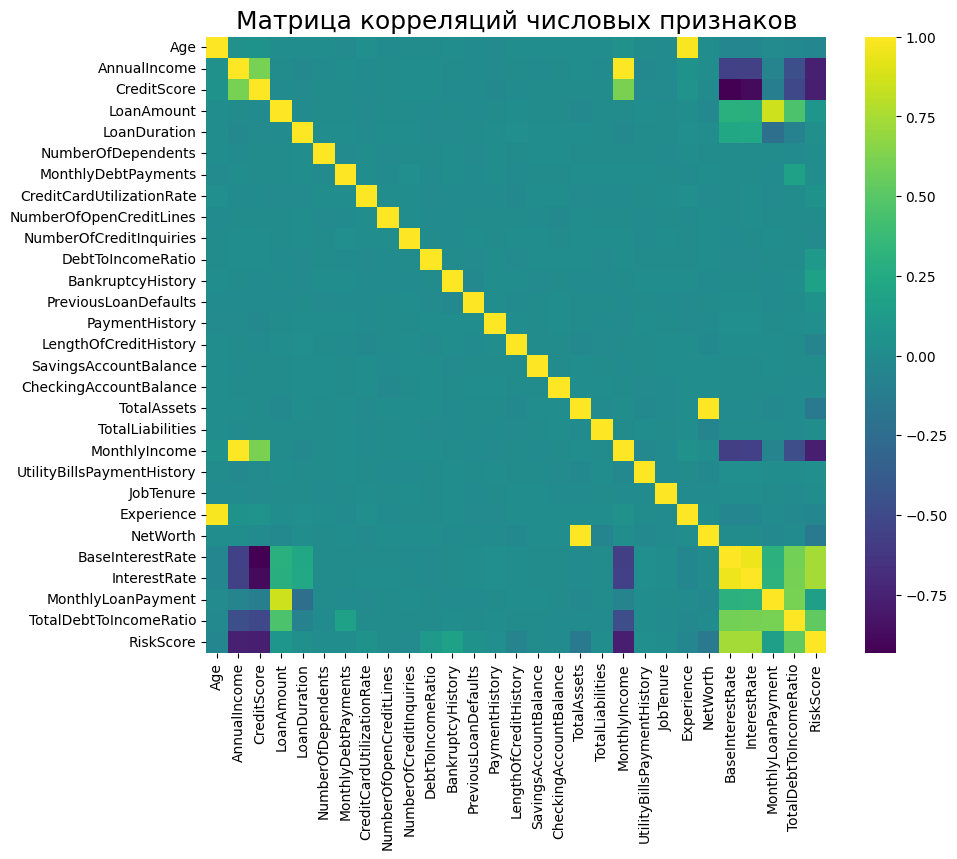

In [165]:
num_features = data_train.select_dtypes(include=np.number).columns.tolist()

correlation = pd.concat([data_train[num_features], y], axis=1)
corr_matrix = correlation.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='viridis')
plt.title('Матрица корреляций числовых признаков', fontsize=18)
plt.show()

Видно, что **MonthlyIncome** и **AnnualIncome** сильно коррелируют друг с другом, что может негативно сказаться на обучении модели. Давайте удалим **AnnualIncome** из обеих выборок.

In [166]:
data_train.drop(columns=['AnnualIncome'], inplace=True)
data_test.drop(columns=['AnnualIncome'], inplace=True)

In [167]:
num_features = data_train.select_dtypes(include=np.number).columns.tolist()
print("Числовых признаков после предобработки:", len(num_features))
print(num_features, "\n")

for x in num_features:
  print(data_train[x].describe(), "\n")

Числовых признаков после предобработки: 27
['Age', 'CreditScore', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'Experience', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio'] 

count    10272.000000
mean        39.862344
std         11.604454
min         18.000000
25%         32.000000
50%         40.000000
75%         48.000000
max         80.000000
Name: Age, dtype: float64 

count    10272.000000
mean       679.993185
std        171.438700
min        300.000000
25%        560.000000
50%        722.000000
75%        850.000000
max        850.000000
Name: CreditScore, dtype: flo

Как можно заметить, ни в одном из численных признаков нет заметных выбросов (по значениям), но давайте еще и графиков построим, чтобы посмотреть разброс значений от количества.

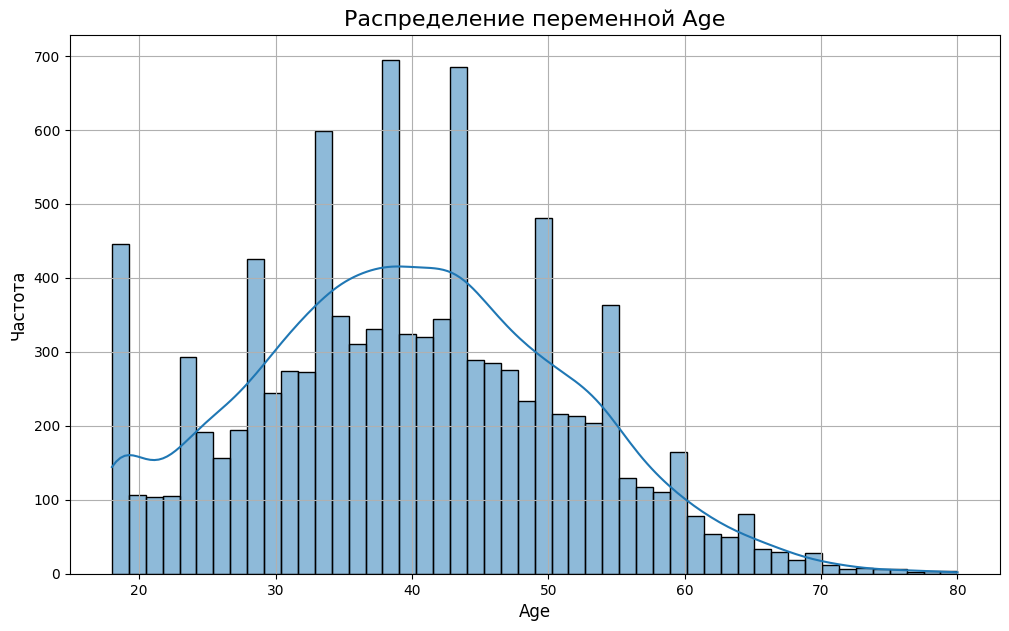

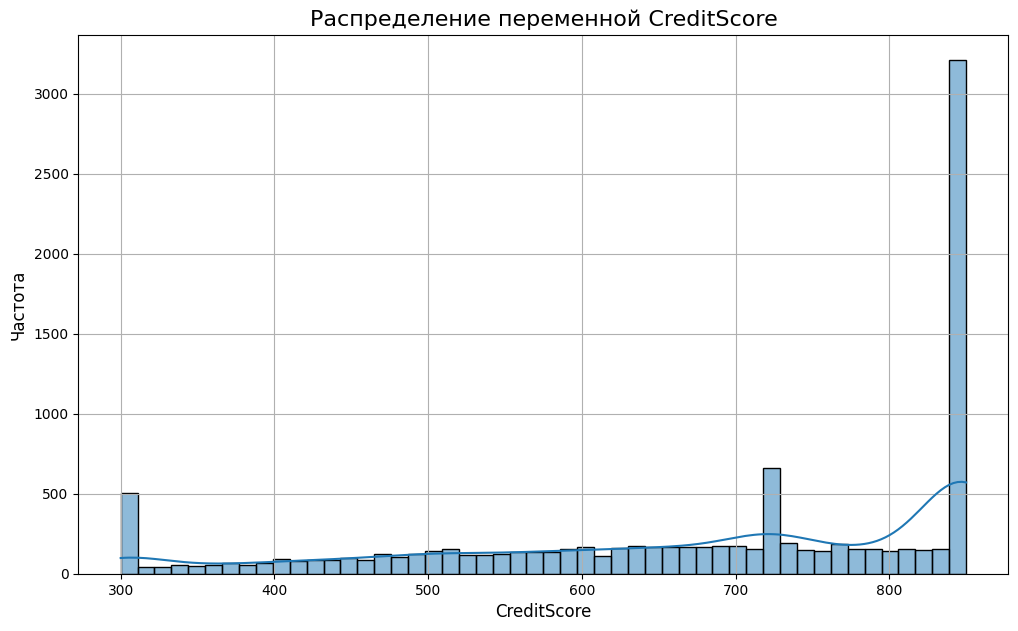

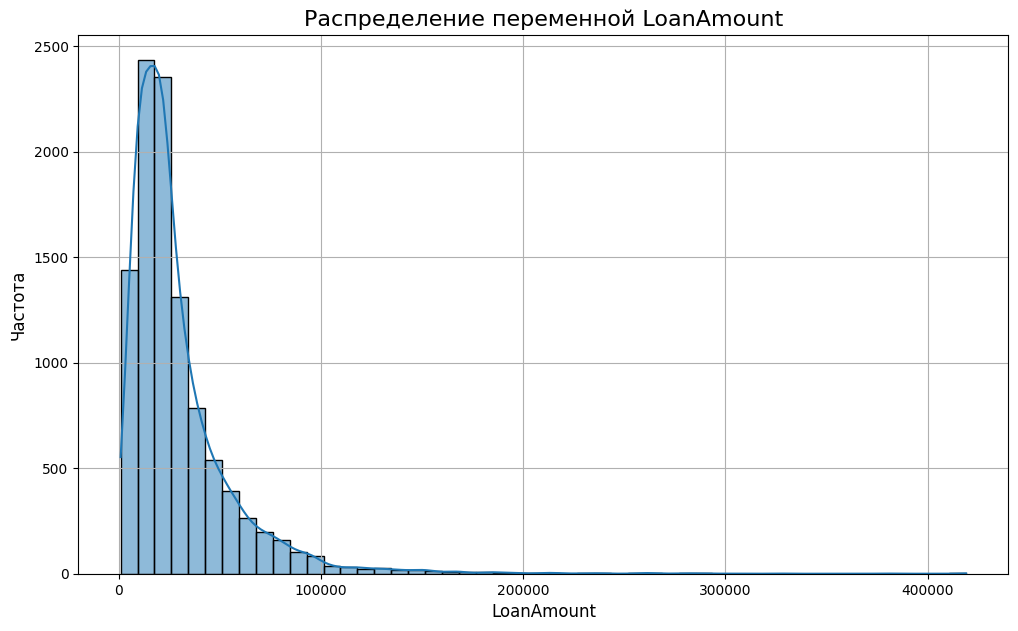

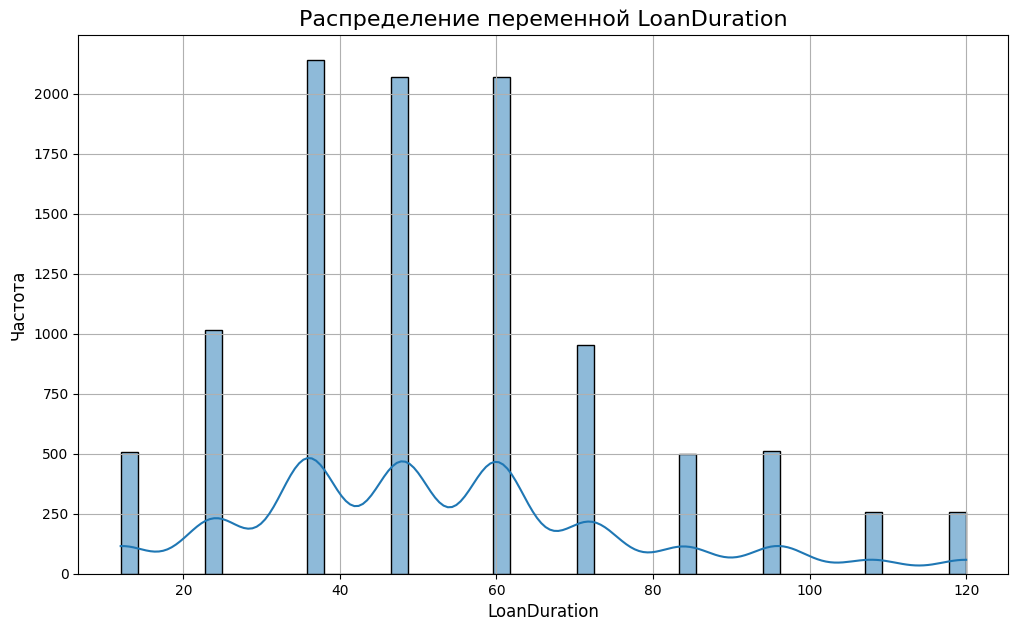

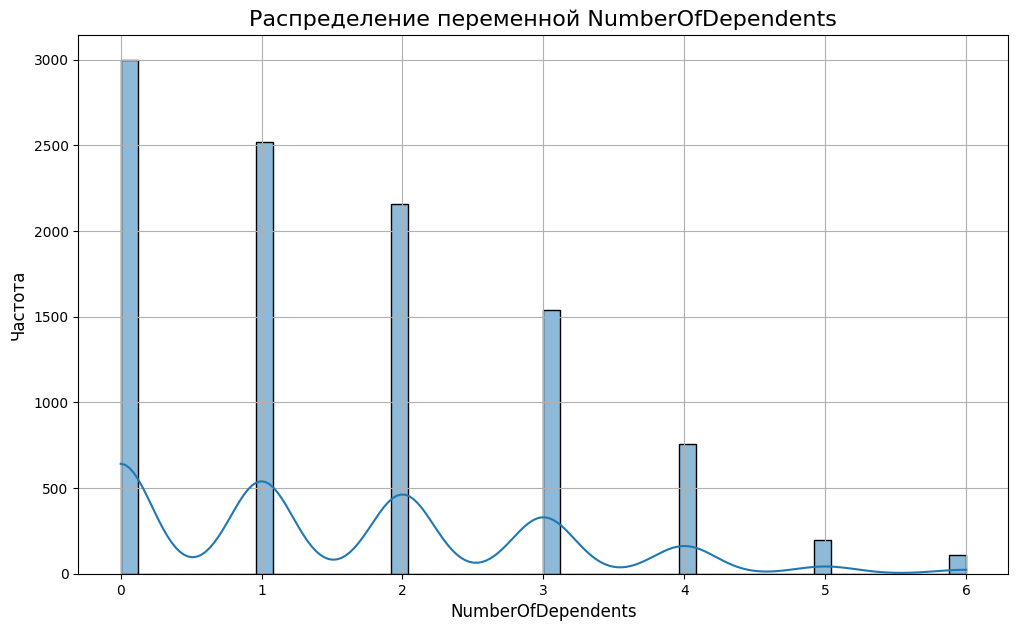

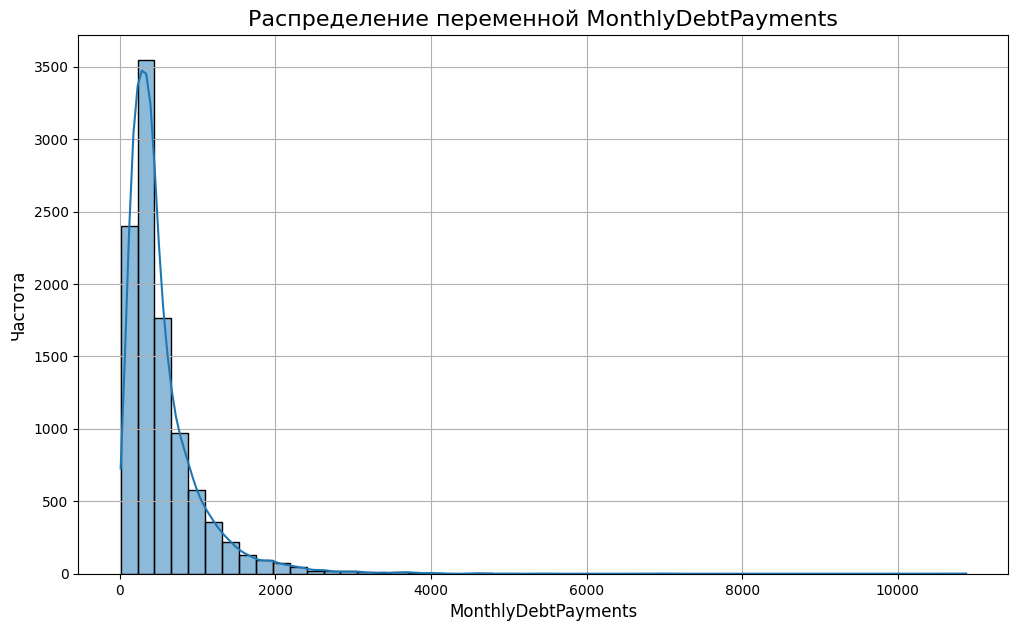

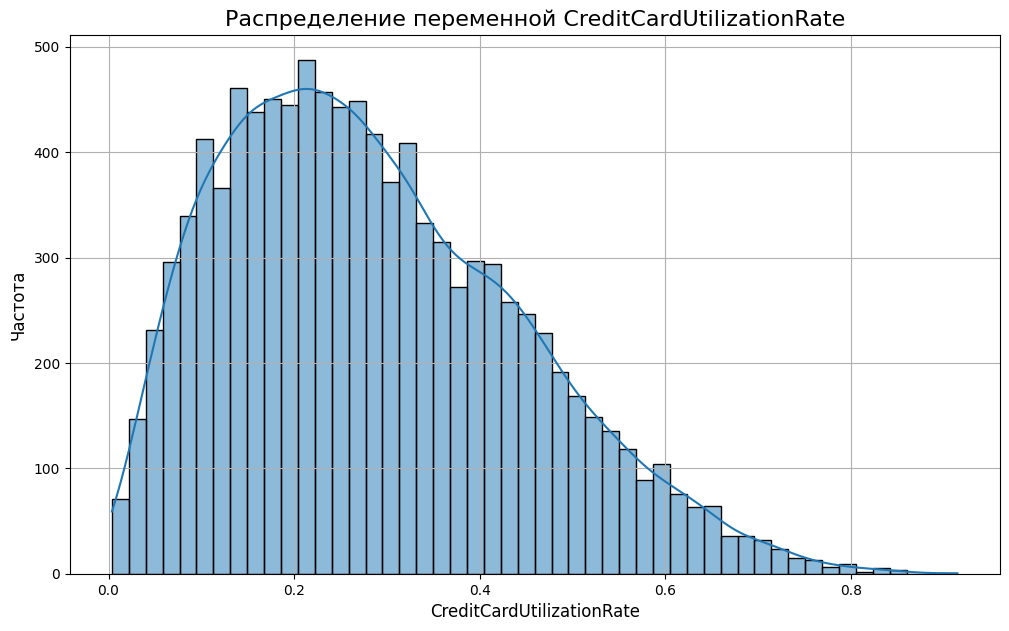

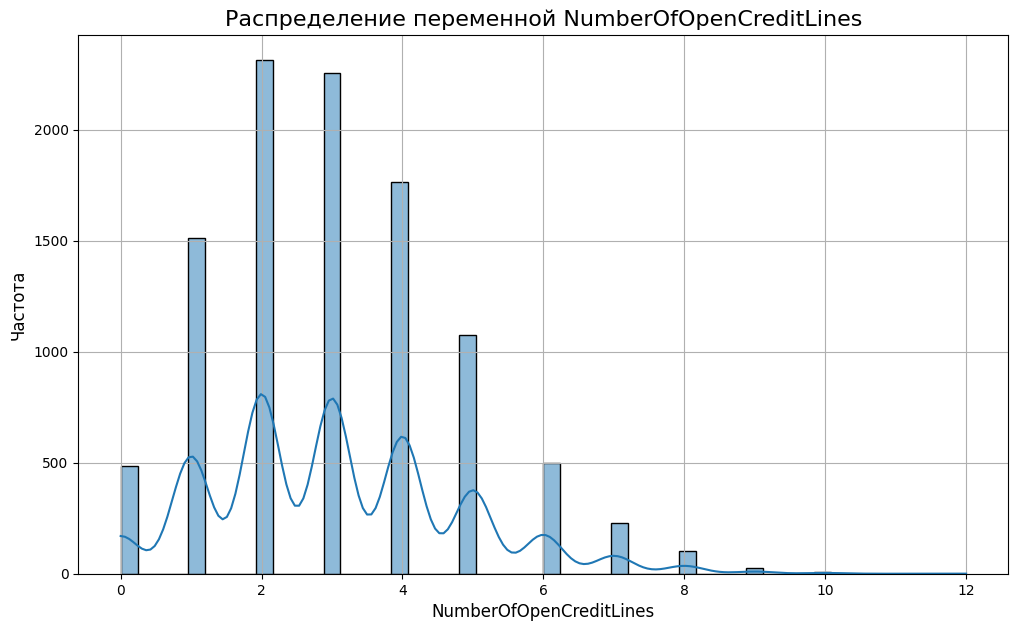

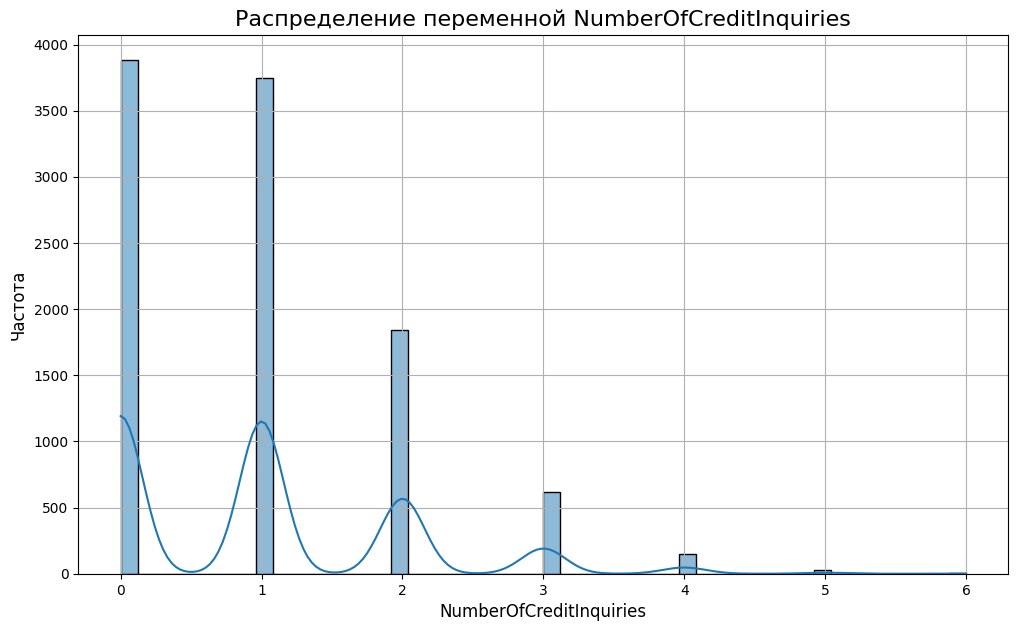

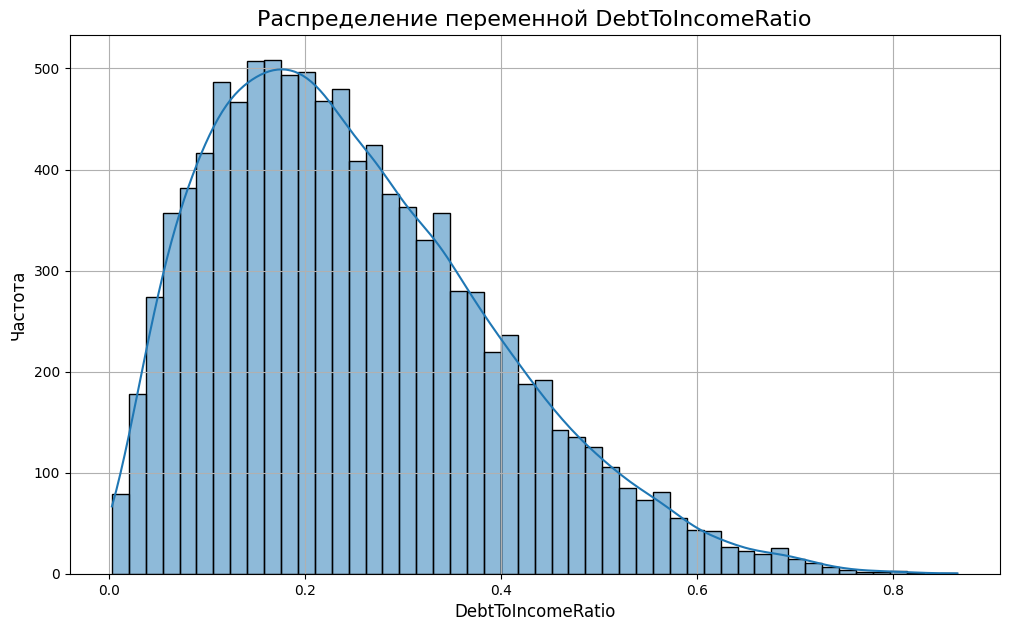

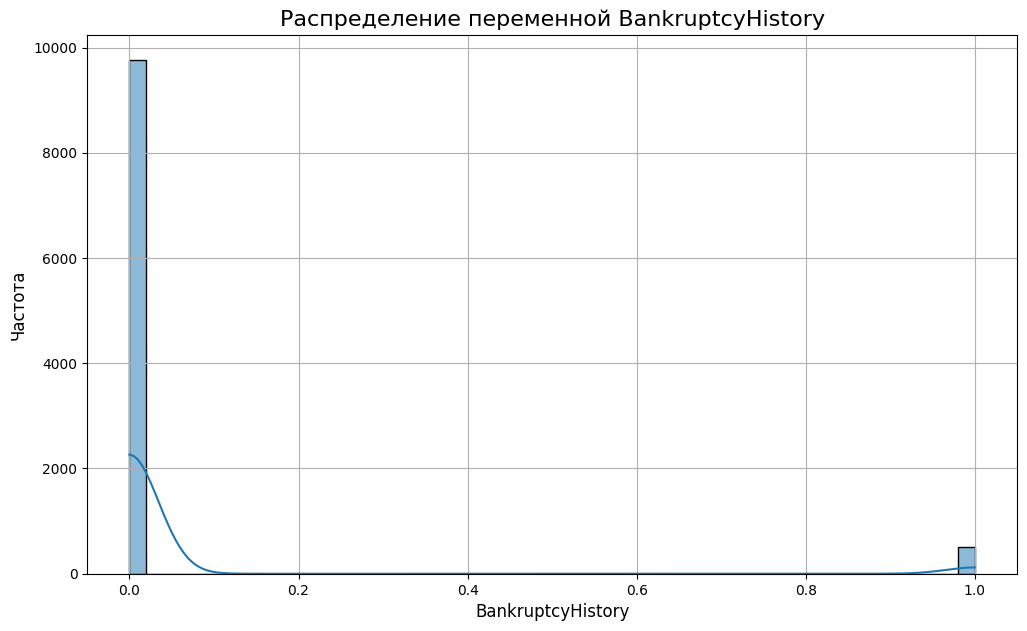

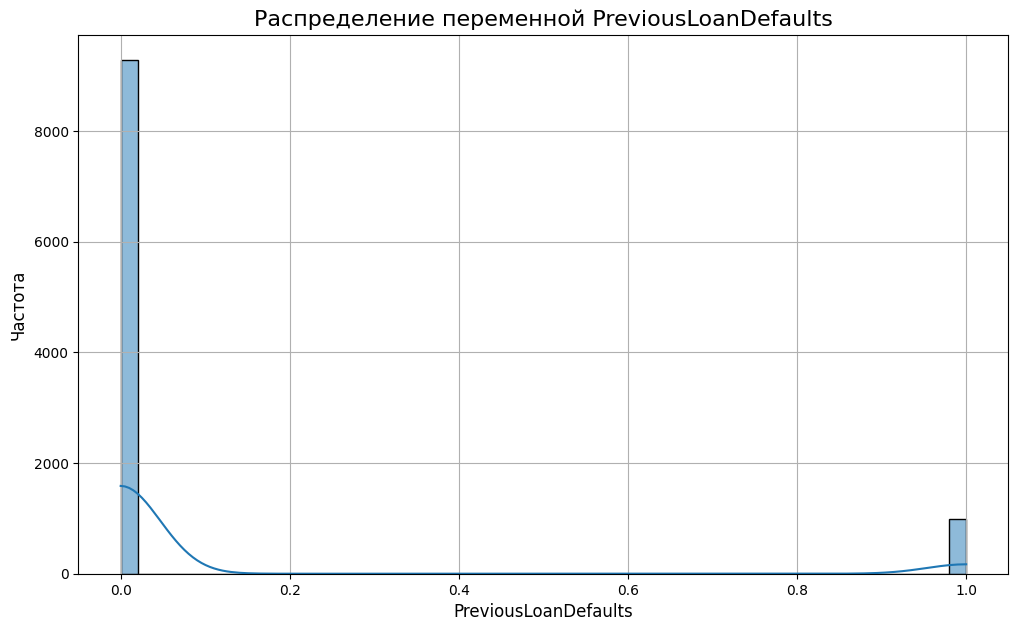

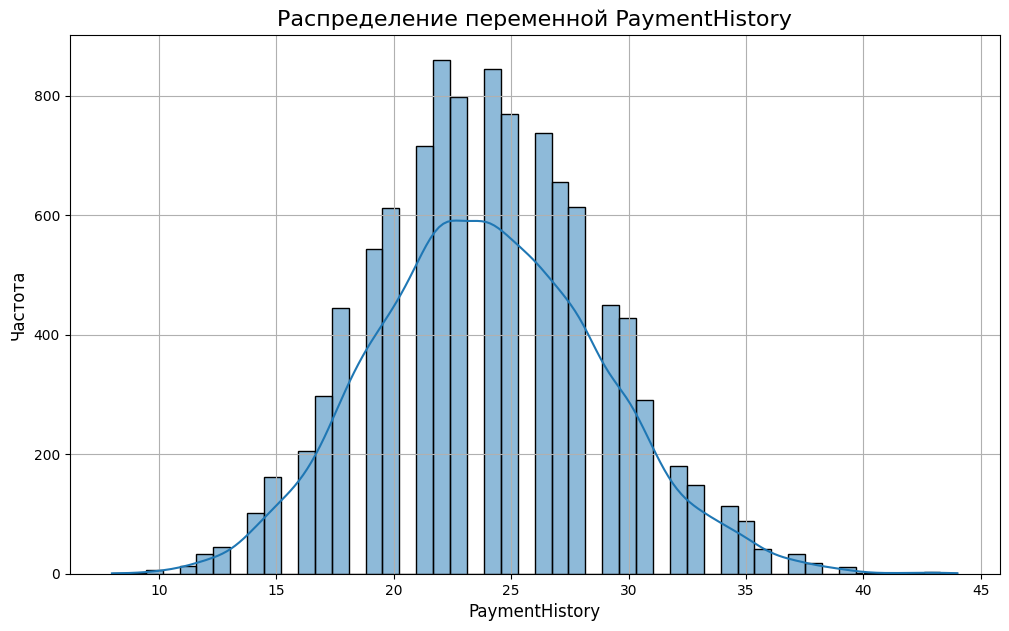

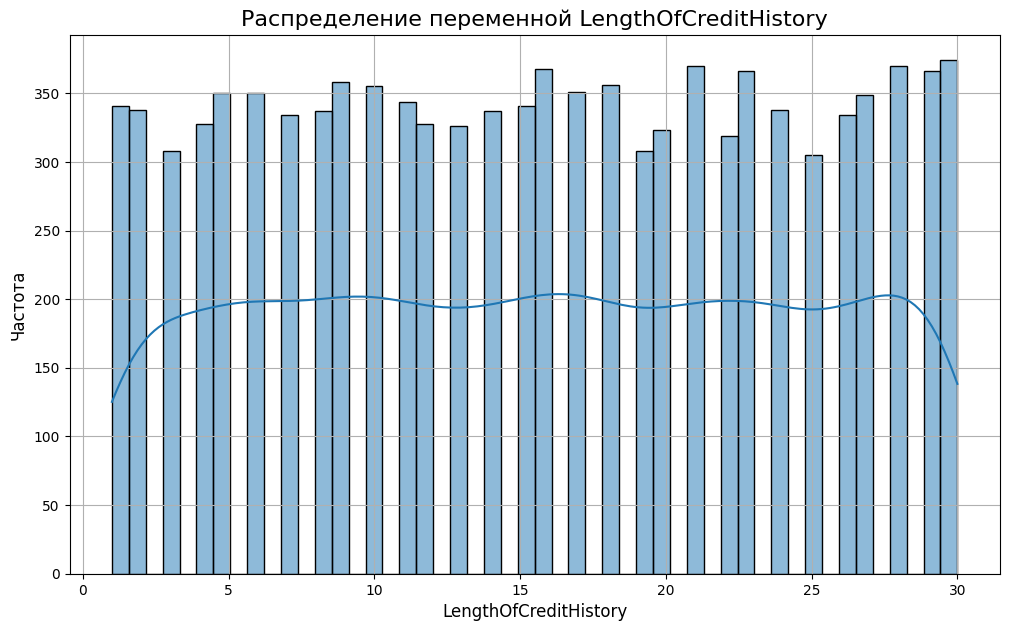

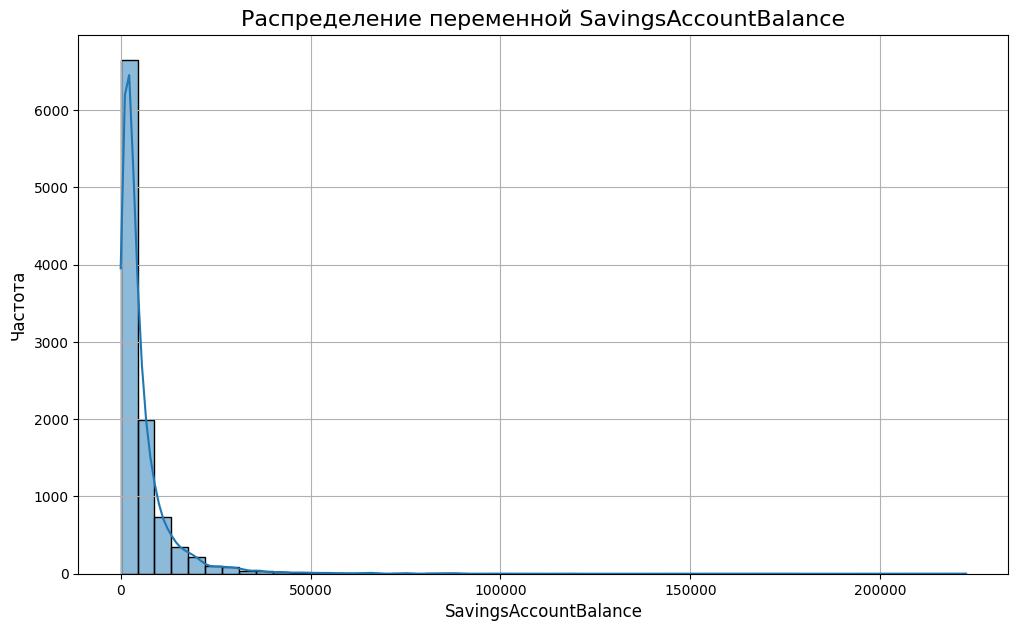

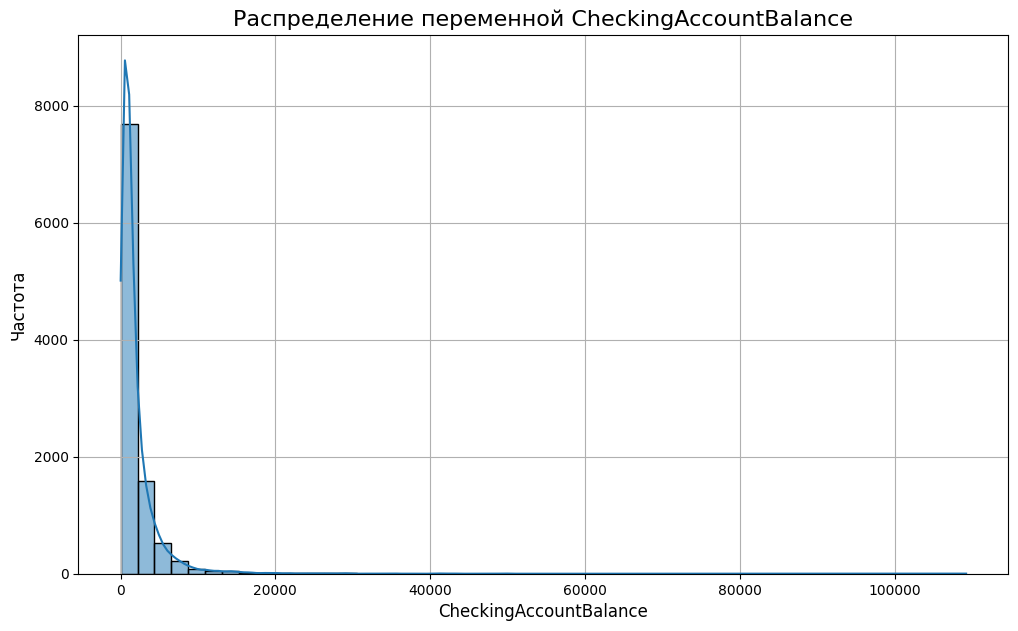

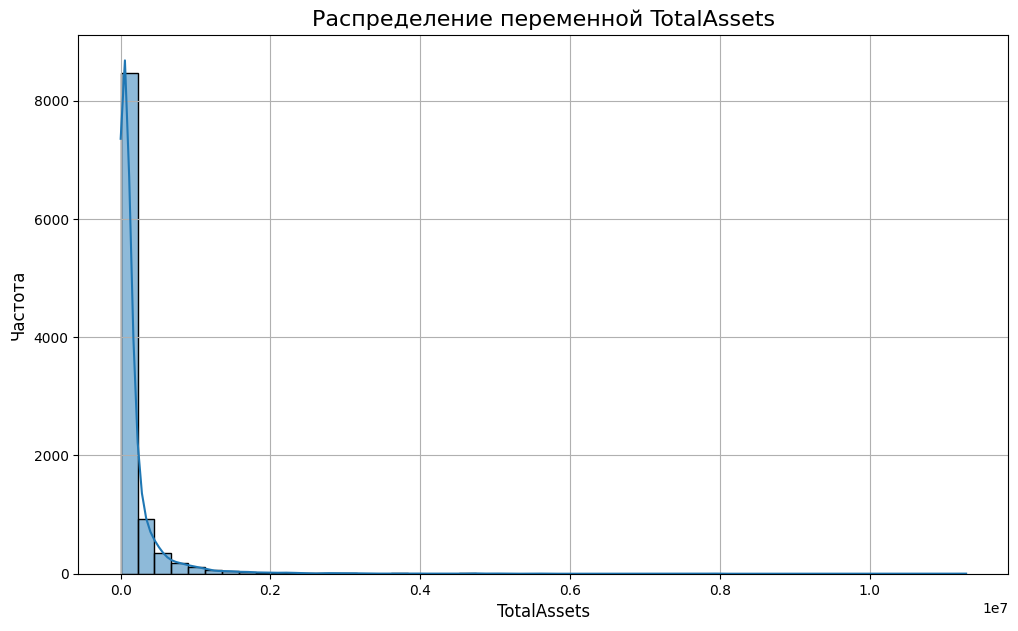

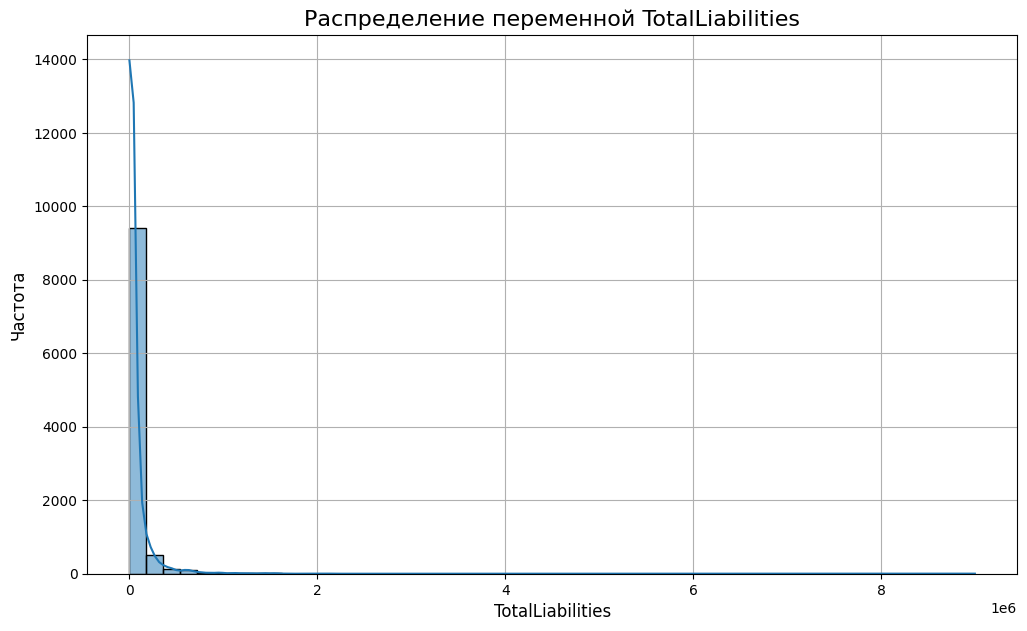

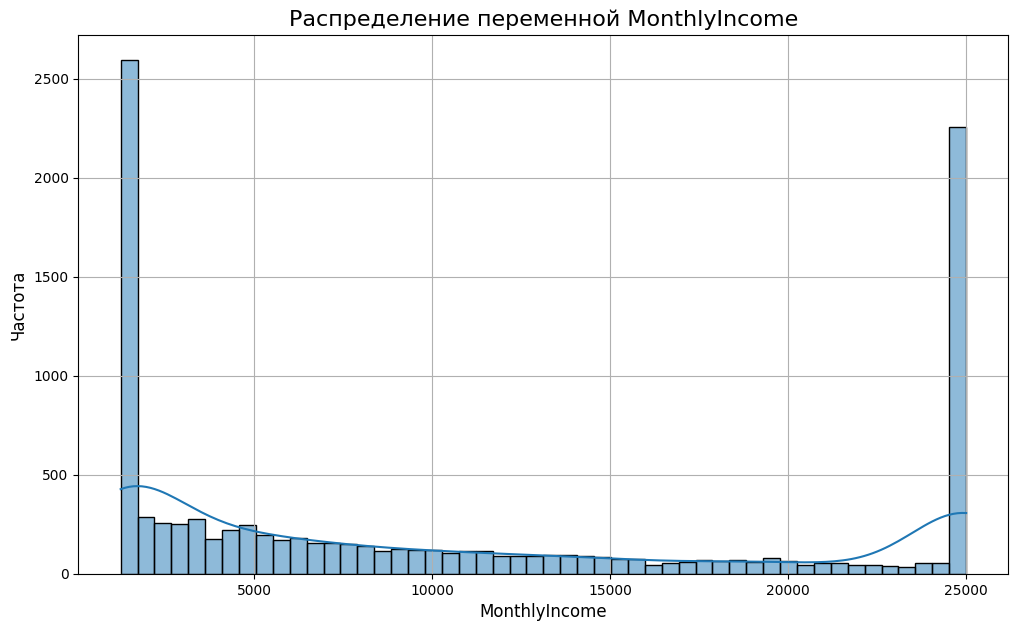

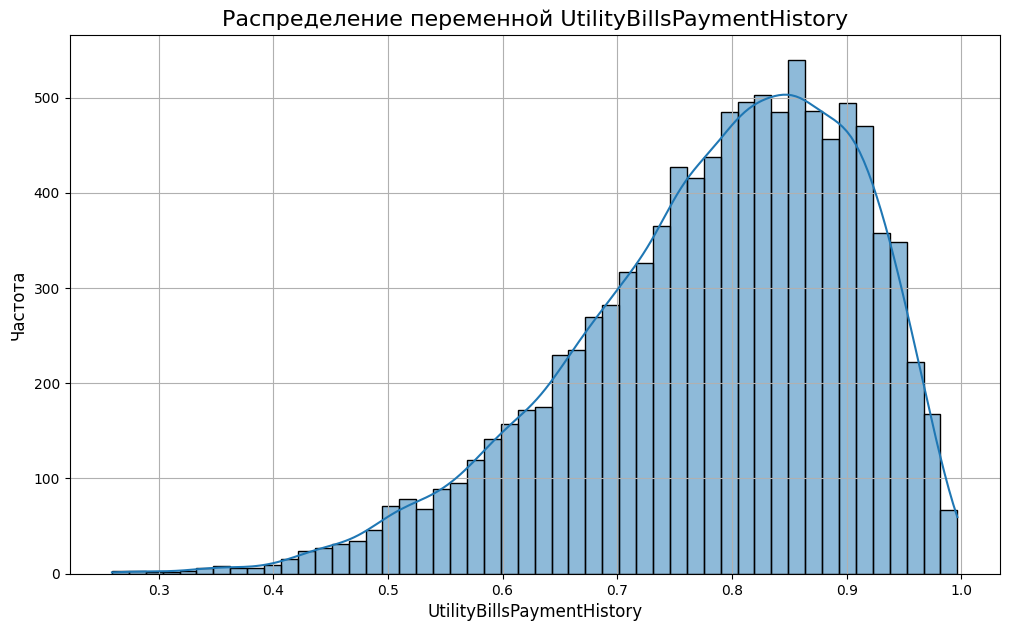

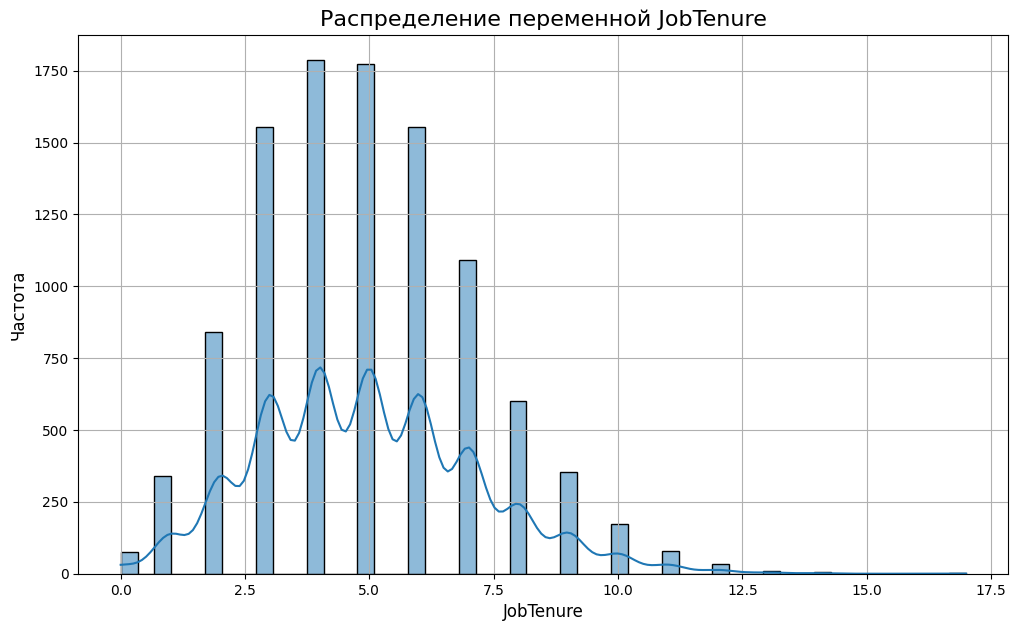

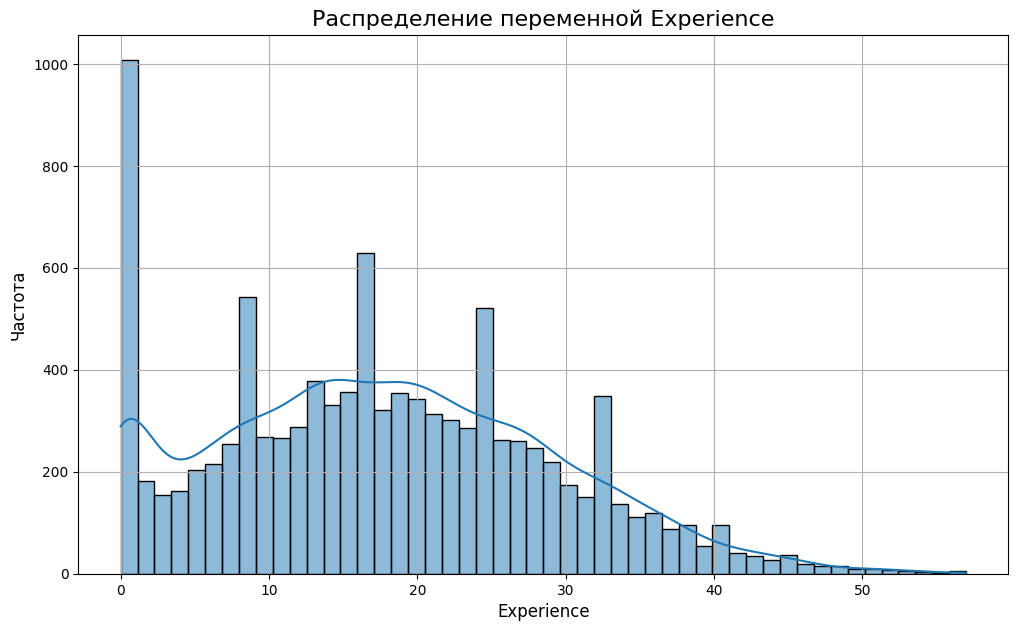

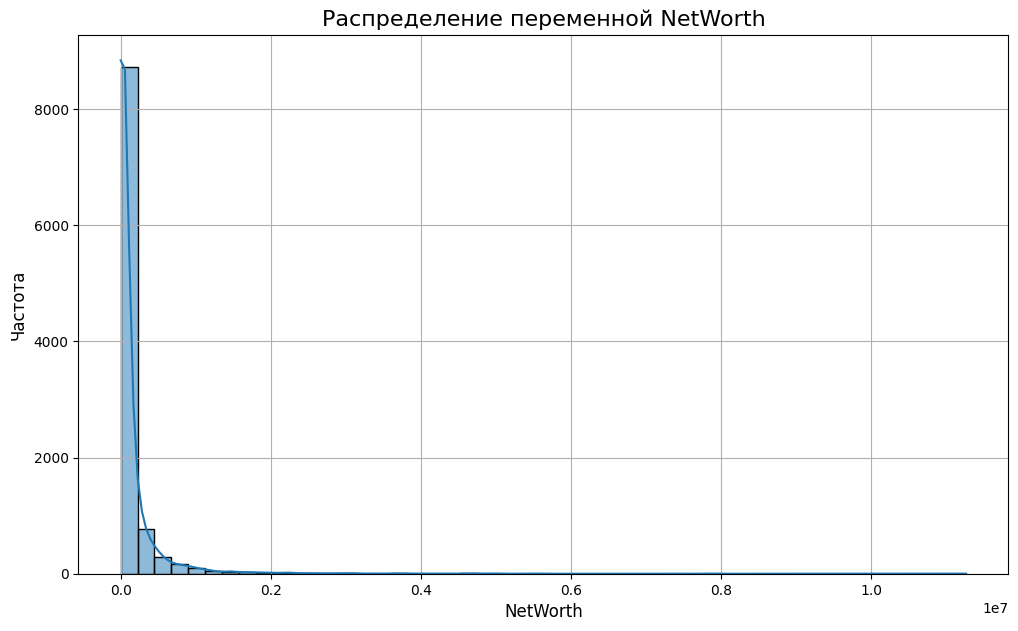

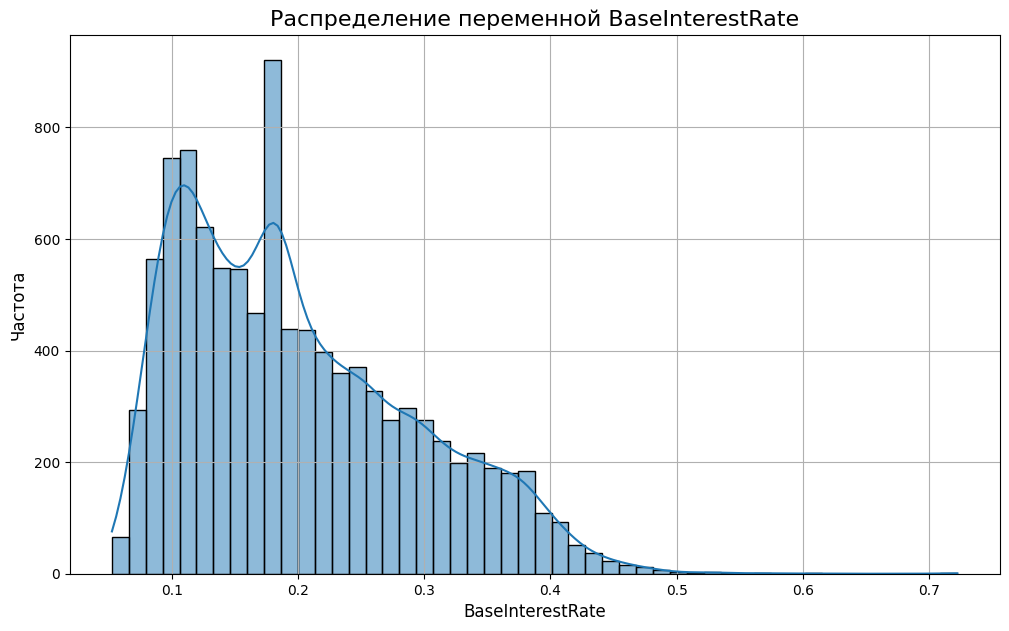

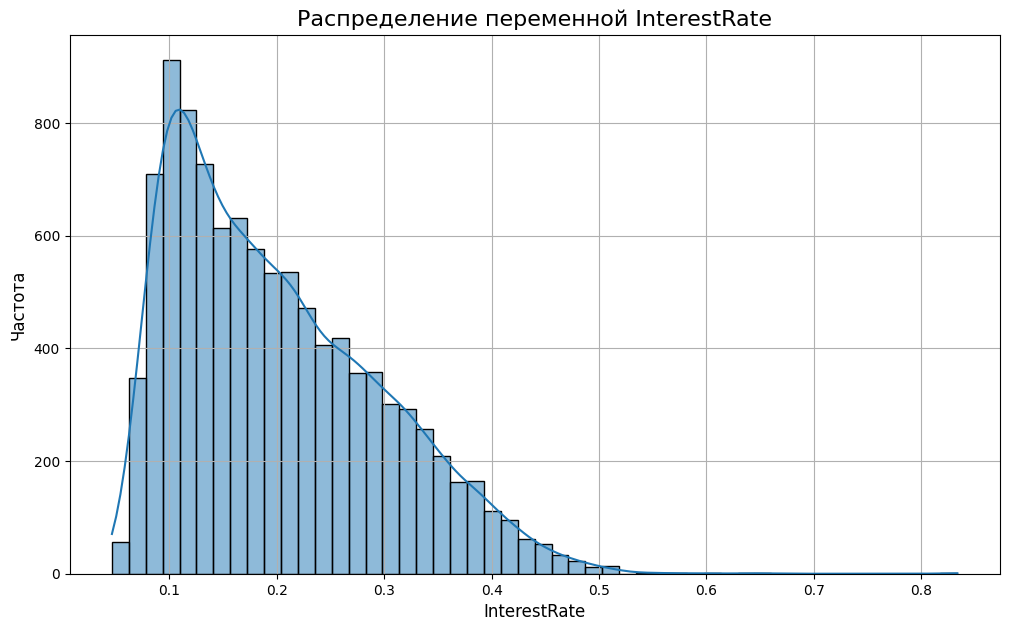

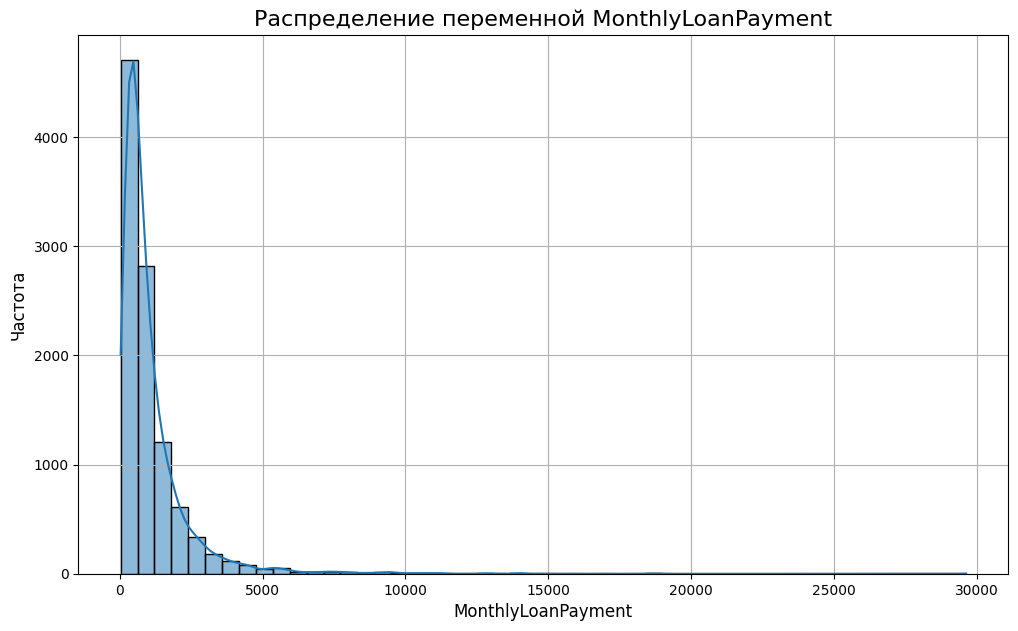

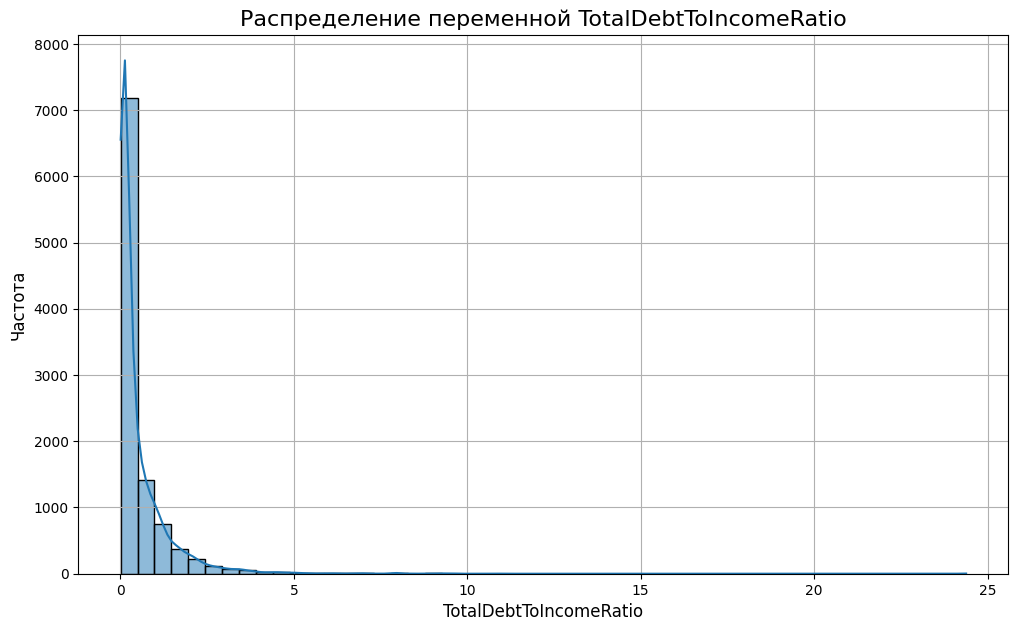

In [168]:
for x in num_features:
  plt.figure(figsize=(12, 7))
  sns.histplot(data_train[x], bins=50, kde=True)
  plt.title(f'Распределение переменной {x}', fontsize=16)
  plt.xlabel(f'{x}', fontsize=12)
  plt.ylabel('Частота', fontsize=12)
  plt.grid(True)
  plt.show()

По графикам можно легко понять, что у нас присутствуют признаки с "хвостами", с которыми нужно что-то делать. Попробуем привести их к нормальным с помощью обрезания этих самых "хвостов".



In [169]:
q_low = 0.05
q_high = 0.95

for col in num_features:
  low = data_train[col].quantile(q_low)
  high = data_train[col].quantile(q_high)
  data_train[col] = np.clip(data_train[col], low, high)
  data_test[col] = np.clip(data_test[col], low, high)

Теперь накинем ручных признаков, которые будут хорошо коллерировать с целевой переменной и позволят добиться лучшего результата на обучении модели.

1. Создадим признаки - отношения:

In [170]:
def create_iterations(df):
  epsilon = 1e-6
  if 'TotalLiabilities' in df.columns and 'TotalAssets' in df.columns:
      df['DebtToAssets_Ratio'] = df['TotalLiabilities'] / (df['TotalAssets'] + epsilon)
  if 'LoanAmount' in df.columns and 'MonthlyIncome' in df.columns:
      df['LoanToIncome_Ratio'] = df['LoanAmount'] / (df['MonthlyIncome'] + epsilon)
  if 'MonthlyLoanPayment' in df.columns and 'MonthlyIncome' in df.columns:
      df['PaymentToIncome_Ratio'] = df['MonthlyLoanPayment'] / (df['MonthlyIncome'] + epsilon)
  return df

data_train = create_iterations(data_train)
data_test = create_iterations(data_test)

2. Посмотрим на числовых признаках, какие значения каждый признак принимает больше всего, и создадим такие признаки.

In [171]:
for col in num_features:
  print(data_train[col].value_counts())

Age
59.0    585
20.0    553
39.0    350
35.0    348
43.0    345
38.0    344
42.0    344
44.0    340
37.0    331
40.0    324
41.0    320
36.0    311
34.0    302
33.0    296
45.0    289
46.0    285
47.0    276
31.0    274
32.0    273
49.0    258
30.0    244
48.0    233
50.0    223
29.0    221
51.0    216
52.0    213
28.0    205
53.0    204
54.0    197
27.0    194
25.0    191
55.0    166
26.0    157
24.0    151
23.0    142
56.0    130
57.0    117
58.0    111
22.0    105
21.0    104
Name: count, dtype: int64
CreditScore
850.0    3045
313.0     518
722.0     493
791.0      26
735.0      26
         ... 
316.0       2
319.0       2
327.0       2
325.0       1
373.0       1
Name: count, Length: 536, dtype: int64
LoanAmount
6131.65     514
78641.65    514
21836.00    486
38893.00      4
7501.00       4
           ... 
29877.00      1
75978.00      1
66670.00      1
49531.00      1
11894.00      1
Name: count, Length: 7620, dtype: int64
LoanDuration
36.0    2138
60.0    2067
48.0    2067
24.0  

Из количества значений в каждом признаке видно, что реально влияющими являются **MonthlyIncome** и **CreditScore**. Создадим соответствующие признаки

In [172]:
if 'MonthlyIncome' in data_train.columns:
  data_train['MonthlyIncome_Is1250'] = (data_train['MonthlyIncome'] == 1250).astype(int)
  data_train['MonthlyIncome_Is25000'] = (data_train['MonthlyIncome'] == 25000).astype(int)
  data_test['MonthlyIncome_Is1250'] = (data_test['MonthlyIncome'] == 1250).astype(int)
  data_test['MonthlyIncome_Is25000'] = (data_test['MonthlyIncome'] == 25000).astype(int)

if 'CreditScore' in data_train.columns:
  data_train['CreditScore_Is850'] = (data_train['CreditScore'] == 850).astype(int)
  data_train['CreditScore_Is313'] = (data_train['CreditScore'] == 313).astype(int)
  data_test['CreditScore_Is850'] = (data_test['CreditScore'] == 850).astype(int)
  data_test['CreditScore_Is313'] = (data_test['CreditScore'] == 313).astype(int)

Также создадим различные числовые вариации уже имеющихся категориальныъ признаков. Начнем с LabelEncoding подходящих под этот тип енкодинга признаков.

In [173]:
education_map = {'Doctorate': 0, 'Master': 1, 'Bachelor': 2, 'Associate': 3, 'High School': 4}
if 'EducationLevel' in data_train.columns:
    data_train["EducationLevel_num"] = data_train["EducationLevel"].map(education_map).fillna(2)
    data_test["EducationLevel_num"] = data_test["EducationLevel"].map(education_map).fillna(2)
    print("Создан EducationLevel_num")

employment_status_map = {"Employed": 0, "Self-Employed": 1, "Unemployed": 2}
if 'EmploymentStatus' in data_train.columns:
    data_train["EmploymentStatus_num"] = data_train["EmploymentStatus"].map(employment_status_map).fillna(1)
    data_test["EmploymentStatus_num"] = data_test["EmploymentStatus"].map(employment_status_map).fillna(1)
    print("Создан EmploymentStatus_num")

loan_purpose_map = {'Home': 0, 'Auto': 1, 'Education': 2, 'Debt Consolidation': 3, 'Other': 4}
if 'LoanPurpose' in data_train.columns:
    data_train['LoanPurpose_num'] = data_train['LoanPurpose'].map(loan_purpose_map).fillna(2)
    data_test['LoanPurpose_num'] = data_test['LoanPurpose'].map(loan_purpose_map).fillna(2)
    print("Создан LoanPurpose_num")

home_status_map = {"Own": 0, "Mortgage": 1, "Rent": 2, "Other": 3}
if 'HomeOwnershipStatus' in data_train.columns:
    data_train["HomeOwnershipStatus_num"] = data_train["HomeOwnershipStatus"].map(home_status_map).fillna(1.5)
    data_test["HomeOwnershipStatus_num"] = data_test["HomeOwnershipStatus"].map(home_status_map).fillna(1.5)
    print("Создан HomeOwnershipStatus_num")

Создан EducationLevel_num
Создан EmploymentStatus_num
Создан LoanPurpose_num
Создан HomeOwnershipStatus_num


Теперь создадим сложные признаки и взаимодействия между признаками

In [174]:
if 'CreditScore' in data_train.columns:
  if 'CreditScore_Sqrt' not in data_train.columns:
    data_train['CreditScore_sqrt2'] = np.sqrt(data_train['CreditScore'])
    data_test['CreditScore_sqrt2'] = np.sqrt(data_test['CreditScore'])
  if 'CreditScore_Cbrt' not in data_train.columns:
    data_train['CreditScore_sqrt3'] = np.cbrt(data_train['CreditScore'])
    data_test['CreditScore_sqrt3'] = np.cbrt(data_test['CreditScore'])

if 'TotalDebtToIncomeRatio' in data_train.columns:
  if 'TotalDebtToIncomeRatio_sqrt2' not in data_train.columns:
    data_train["TotalDebtToIncomeRatio_sqrt2"] = np.sqrt(data_train['TotalDebtToIncomeRatio'])
    data_test['TotalDebtToIncomeRatio_sqrt2'] = np.sqrt(data_test['TotalDebtToIncomeRatio'])
  if 'TotalDebtToIncomeRatio_sqrt3' not in data_train.columns:
    data_train["TotalDebtToIncomeRatio_sqrt3"] = np.cbrt(data_train['TotalDebtToIncomeRatio'])
    data_test['TotalDebtToIncomeRatio_sqrt3'] = np.cbrt(data_test['TotalDebtToIncomeRatio'])

if 'CreditScore' in data_train.columns and 'TotalDebtToIncomeRatio' in data_train.columns:
  if 'CreditScore_TotalDebtToIncomeRatio' not in data_train.columns:
    data_train["CreditScore_TotalDebtToIncomeRatio"] = data_train["CreditScore"] * data_train["TotalDebtToIncomeRatio"]
    data_test["CreditScore_TotalDebtToIncomeRatio"] = data_test["CreditScore"] * data_test["TotalDebtToIncomeRatio"]

if 'MonthlyIncome' in data_train.columns and 'LoanAmount' in data_train.columns:
  if 'Income_LoanAmount_Interaction' not in data_train.columns:
    data_train["Income_LoanAmount_Interaction"] = data_train["MonthlyIncome"] * data_train["LoanAmount"]
    data_test["Income_LoanAmount_Interaction"] = data_test["MonthlyIncome"] * data_test["LoanAmount"]

if 'TotalDebtToIncomeRatio' in data_train.columns and 'InterestRate' in data_train.columns:
  if 'Debt_Interest_Interaction' not in data_train.columns:
    data_train["Debt_Interest_Interaction"] = data_train["TotalDebtToIncomeRatio"] * data_train["InterestRate"]
    data_test["Debt_Interest_Interaction"] = data_test["TotalDebtToIncomeRatio"] * data_test["InterestRate"]

if 'CreditScore' in data_train.columns and 'TotalDebtToIncomeRatio' in data_train.columns:
  if 'CreditScore_DTI' not in data_train.columns:
    data_train['CreditScore_DTI'] = data_train['CreditScore'] / (data_train['TotalDebtToIncomeRatio'] + 1)
    data_test['CreditScore_DTI'] = data_test['CreditScore'] / (data_test['TotalDebtToIncomeRatio'] + 1)

if 'BaseInterestRate' in data_train.columns and 'MonthlyIncome' in data_train.columns:
  if 'BaseInterestRate_MonthlyIncome' not in data_train.columns:
    data_train["BaseInterestRate_MonthlyIncome"] = data_train['MonthlyIncome'] * data_train["BaseInterestRate"]
    data_test["BaseInterestRate_MonthlyIncome"] = data_test['MonthlyIncome'] * data_test["BaseInterestRate"]

Также создадим и логарифмические преобразования:

In [175]:
features_to_log = ["MonthlyLoanPayment", "LoanAmount", "NetWorth", "TotalAssets",
                   "CreditScore", "TotalDebtToIncomeRatio", "CreditScore_TotalDebtToIncomeRatio"]

for feature in features_to_log:
    if feature in data_train.columns and f'Log_{feature}' not in data_train.columns:
        data_train[f'Log_{feature}'] = np.log1p(data_train[feature])
        data_test[f'Log_{feature}'] = np.log1p(data_test[feature])

In [176]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10272 entries, 0 to 11016
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     10272 non-null  float64
 1   CreditScore                             10272 non-null  float64
 2   LoanAmount                              10272 non-null  float64
 3   LoanDuration                            10272 non-null  float64
 4   MaritalStatus                           10272 non-null  object 
 5   NumberOfDependents                      10272 non-null  float64
 6   HomeOwnershipStatus                     10272 non-null  object 
 7   MonthlyDebtPayments                     10272 non-null  float64
 8   CreditCardUtilizationRate               10272 non-null  float64
 9   NumberOfOpenCreditLines                 10272 non-null  float64
 10  NumberOfCreditInquiries                 10272 non-null  float64

In [177]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     5000 non-null   int64  
 1   CreditScore                             5000 non-null   int64  
 2   LoanAmount                              5000 non-null   float64
 3   LoanDuration                            5000 non-null   int64  
 4   MaritalStatus                           5000 non-null   object 
 5   NumberOfDependents                      5000 non-null   int64  
 6   HomeOwnershipStatus                     5000 non-null   object 
 7   MonthlyDebtPayments                     5000 non-null   float64
 8   CreditCardUtilizationRate               5000 non-null   float64
 9   NumberOfOpenCreditLines                 5000 non-null   int64  
 10  NumberOfCreditInquiries                 5000 non-null   int6

Добавим биннинг

In [178]:
numeric_for_binning = [col for col in data_train.select_dtypes(include=np.number).columns
                       if not (col.startswith(('MonthlyIncome_Is', 'CreditScore_Is', 'Log_')) or
                               col.endswith(('_sqrt3', '_sqrt2')) or 'Interaction' in col or '_Ratio' in col)]

features_to_bin = ['Age', 'CreditScore', 'LengthOfCreditHistory', 'LoanAmount', 'MonthlyIncome']

features_to_bin = [col for col in features_to_bin if col in data_train.columns and col in numeric_for_binning]

Q_BINS = 8
for col in features_to_bin:
    if col in data_train.columns:
        data_train[f'{col}_bin'] = pd.qcut(data_train[col], q=Q_BINS, labels=False, duplicates='drop').astype('category')
        data_test[f'{col}_bin'] = pd.qcut(data_test[col], q=Q_BINS, labels=False, duplicates='drop').astype('category')
print(f"Признаки {features_to_bin} были дискретизированы и добавлены.")


Признаки ['Age', 'CreditScore', 'LengthOfCreditHistory', 'LoanAmount', 'MonthlyIncome'] были дискретизированы и добавлены.


In [179]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10272 entries, 0 to 11016
Data columns (total 64 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Age                                     10272 non-null  float64 
 1   CreditScore                             10272 non-null  float64 
 2   LoanAmount                              10272 non-null  float64 
 3   LoanDuration                            10272 non-null  float64 
 4   MaritalStatus                           10272 non-null  object  
 5   NumberOfDependents                      10272 non-null  float64 
 6   HomeOwnershipStatus                     10272 non-null  object  
 7   MonthlyDebtPayments                     10272 non-null  float64 
 8   CreditCardUtilizationRate               10272 non-null  float64 
 9   NumberOfOpenCreditLines                 10272 non-null  float64 
 10  NumberOfCreditInquiries                 10272 non-n

Сюда же добавим также и полиномиальные фичи, без них никуда

In [180]:
from sklearn.preprocessing import PolynomialFeatures

exclude_patterns = ['_bin', '_Is', '_sqrt2', '_sqrt3', '_log', 'Interaction', '_Ratio', '_num']

original_numeric_features = [col for col in data_train.select_dtypes(include=np.number).columns.tolist()
                             if not any(pattern in col for pattern in exclude_patterns)]

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

poly_features_train = poly.fit_transform(data_train[original_numeric_features])
poly_df_train = pd.DataFrame(
    poly_features_train,
    columns=poly.get_feature_names_out(original_numeric_features),
    index=data_train.index
)

poly_features_test = poly.transform(data_test[original_numeric_features])
poly_df_test = pd.DataFrame(
    poly_features_test,
    columns=poly.get_feature_names_out(original_numeric_features),
    index=data_test.index
)

categorical_features = data_train.select_dtypes(exclude=np.number).columns.tolist()

new_numeric_features = [col for col in data_train.select_dtypes(include=np.number).columns
                        if col not in original_numeric_features and col not in categorical_features]

print(f"Оригинальных числовых признаков: {len(original_numeric_features)}")
print(f"Новых числовых признаков: {len(new_numeric_features)}")
print(f"Категориальных признаков: {len(categorical_features)}")

# Правильное объединение:
# - полиномиальные признаки (только от оригинальных числовых)
# - все категориальные (включая _bin)
# - новые числовые признаки (созданные вручную)
data_train = pd.concat([
    data_train[categorical_features],
    poly_df_train,
    data_train[new_numeric_features]
], axis=1)

data_test = pd.concat([
    data_test[categorical_features],
    poly_df_test,
    data_test[new_numeric_features]
], axis=1)

print(f"Полиномиальные признаки созданы. Новая размерность X: {data_train.shape}")
print(f"Полиномиальные признаки созданы. Новая размерность X: {data_test.shape}")

Оригинальных числовых признаков: 37
Новых числовых признаков: 17
Категориальных признаков: 10
Полиномиальные признаки созданы. Новая размерность X: (10272, 730)
Полиномиальные признаки созданы. Новая размерность X: (5000, 730)


In [181]:
numeric_features_final = data_train.select_dtypes(include=[np.number]).columns.tolist()
numeric_features_final1 = data_test.select_dtypes(include=[np.number]).columns.tolist()
print("Числовых признаков после предобработки:", len(numeric_features_final))
print(numeric_features_final)  # первые 30 для проверки

print("Числовых признаков после предобработки:", len(numeric_features_final1))
print(numeric_features_final1)  # первые 30 для проверки


Числовых признаков после предобработки: 720
['Age', 'CreditScore', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'Experience', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'CreditScore_TotalDebtToIncomeRatio', 'CreditScore_DTI', 'BaseInterestRate_MonthlyIncome', 'Log_MonthlyLoanPayment', 'Log_LoanAmount', 'Log_NetWorth', 'Log_TotalAssets', 'Log_CreditScore', 'Log_TotalDebtToIncomeRatio', 'Log_CreditScore_TotalDebtToIncomeRatio', 'Age CreditScore', 'Age LoanAmount', 'Age LoanDuration', 'Age NumberOfDependents', 'Age MonthlyDebtPayments', 'Age CreditCardUtilizationRate', 'Age N

In [182]:
all_categorical_features = data_train.select_dtypes(exclude=np.number).columns.tolist()

for col in all_categorical_features:
    data_train[col] = data_train[col].astype('category')
    data_test[col] = data_test[col].astype('category')

for col in all_categorical_features:
    value_counts = data_train[col].value_counts(normalize=True)
    rare_cats = value_counts[value_counts < 0.01].index.tolist()

    if rare_cats:
        # Убедимся, что 'Other' есть в категориях, перед тем как его использовать
        if 'Other' not in data_train[col].cat.categories:
            data_train[col] = data_train[col].cat.add_categories('Other')
            data_test[col] = data_test[col].cat.add_categories('Other')

        data_train[col] = data_train[col].replace(rare_cats, 'Other')
        data_test[col] = data_test[col].replace(rare_cats, 'Other')

data_train = pd.get_dummies(data_train, columns=categorical_features, drop_first=True)
data_test = pd.get_dummies(data_test, columns=categorical_features, drop_first=True)

train_cols = data_train.columns
test_cols = data_test.columns
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    data_test[c] = 0
data_test = data_test[train_cols]

print(f"Итоговая размерность X для обучения: {data_train.shape}")

Итоговая размерность X для обучения: (10272, 767)


Корреляция признаков с RiskScore (по убыванию модуля):
RiskScore                                                  1.000000
CreditScore_DTI Log_TotalAssets                            0.865019
CreditScore_DTI                                            0.861711
CreditScore_DTI Log_CreditScore                            0.861700
CreditScore_DTI Log_LoanAmount                             0.855914
CreditScore CreditScore_DTI                                0.850878
CreditScore_DTI Log_NetWorth                               0.850236
CreditScore_DTI Log_MonthlyLoanPayment                     0.837787
BaseInterestRate Log_CreditScore_TotalDebtToIncomeRatio    0.815579
InterestRate Log_CreditScore_TotalDebtToIncomeRatio        0.815400
Name: RiskScore, dtype: float64


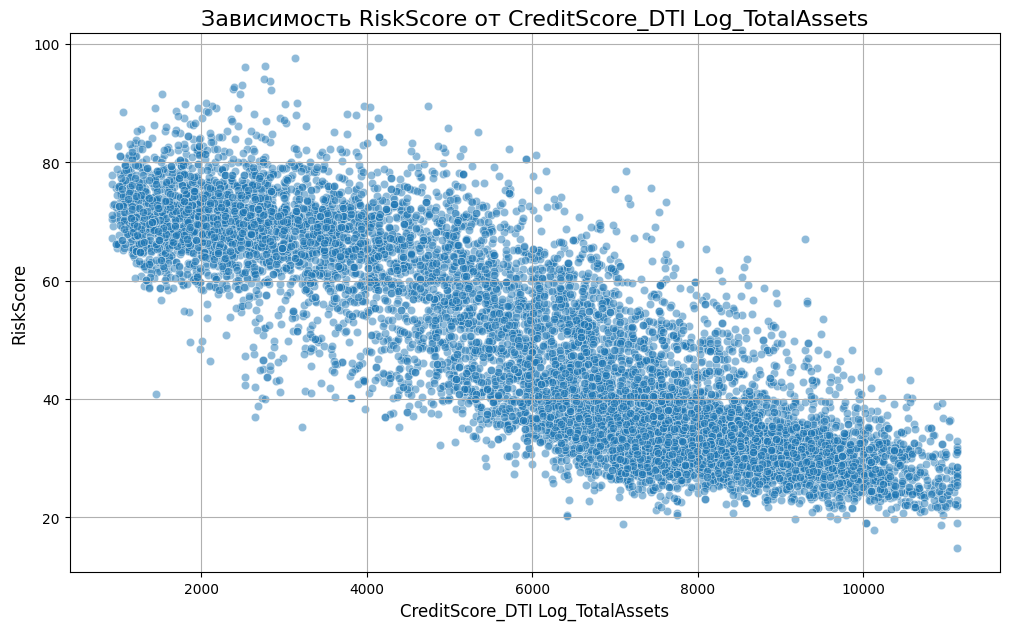

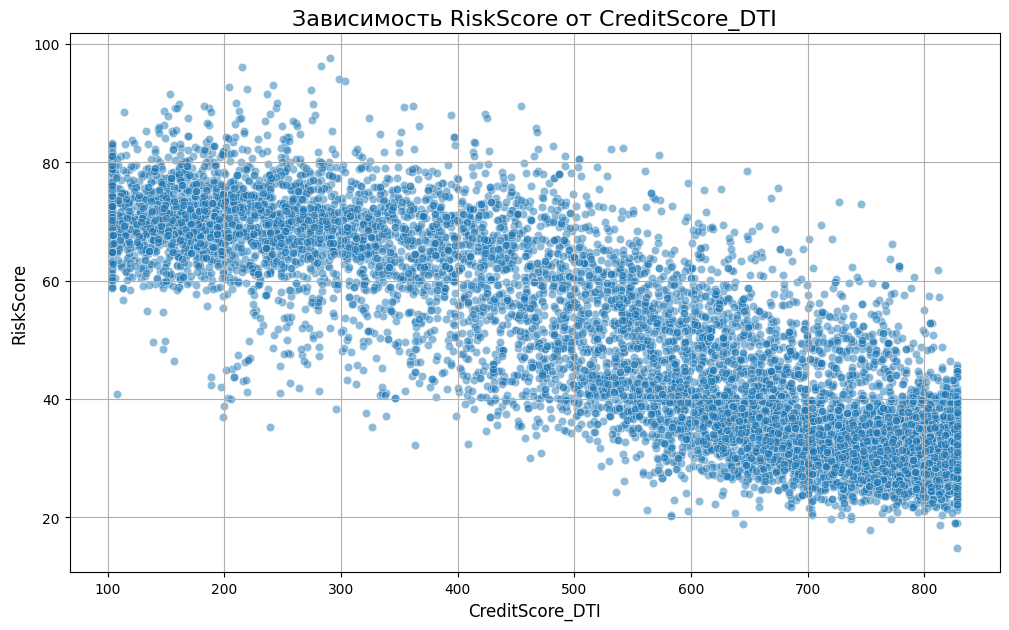

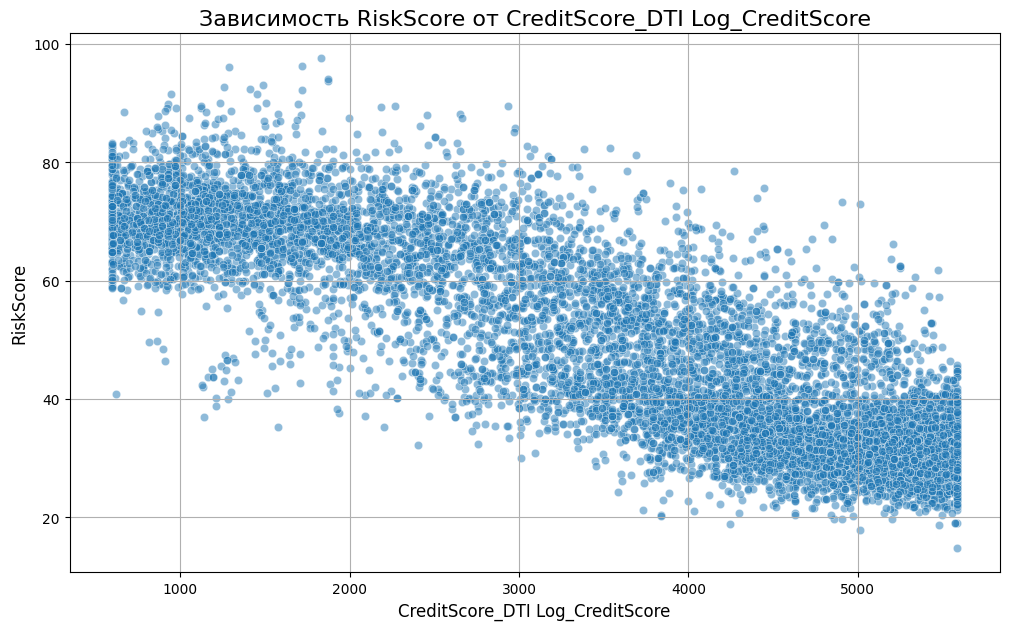

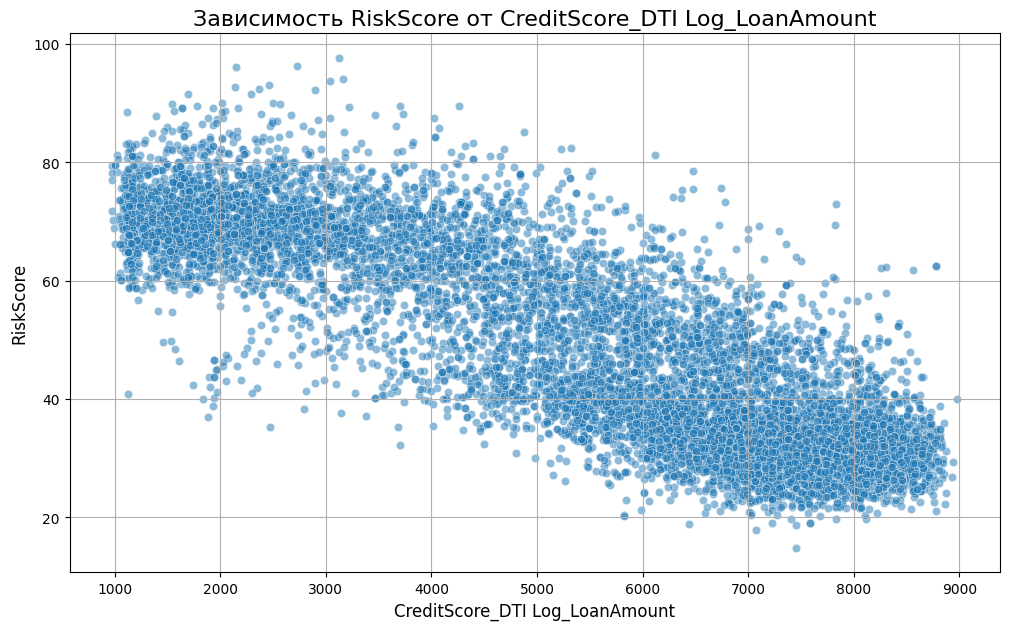

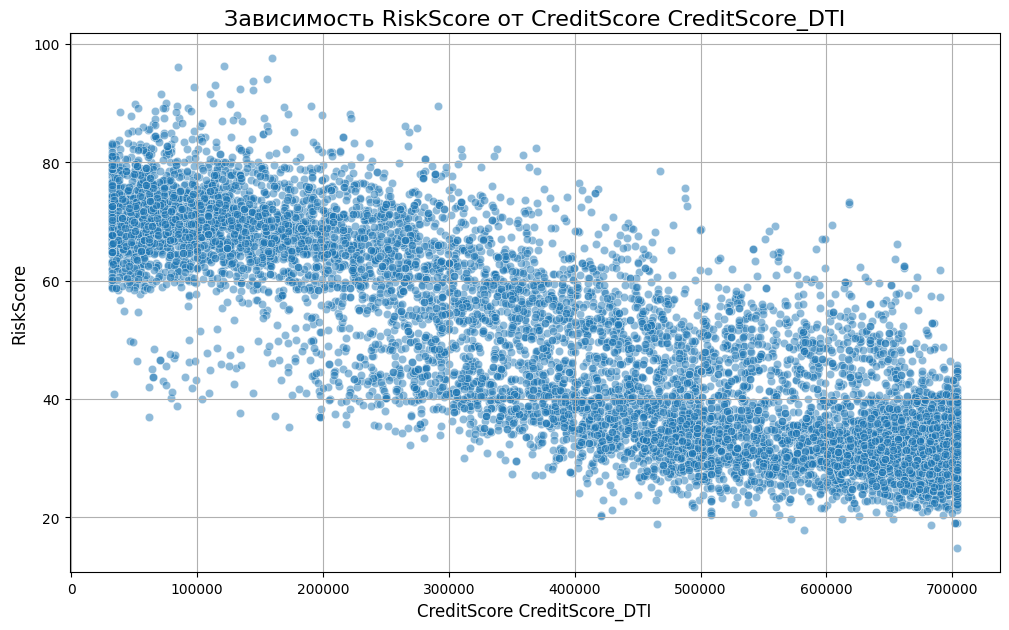

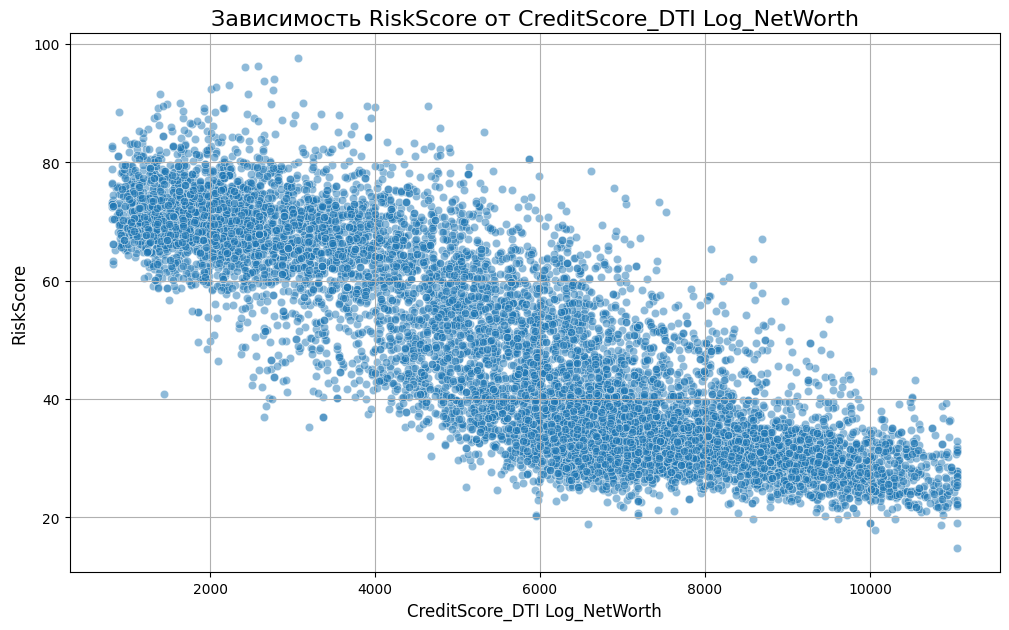

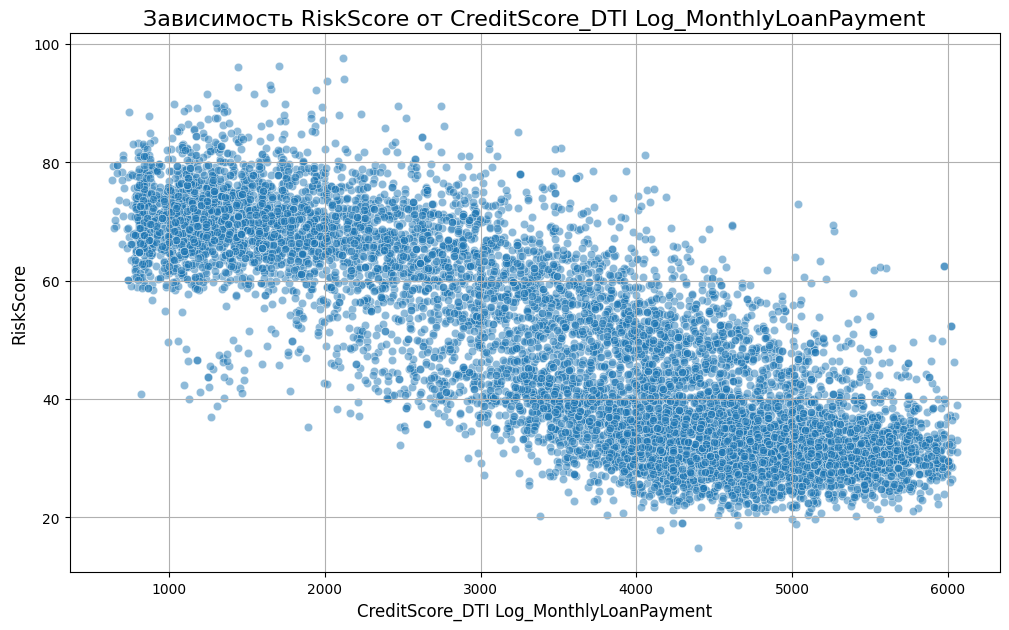

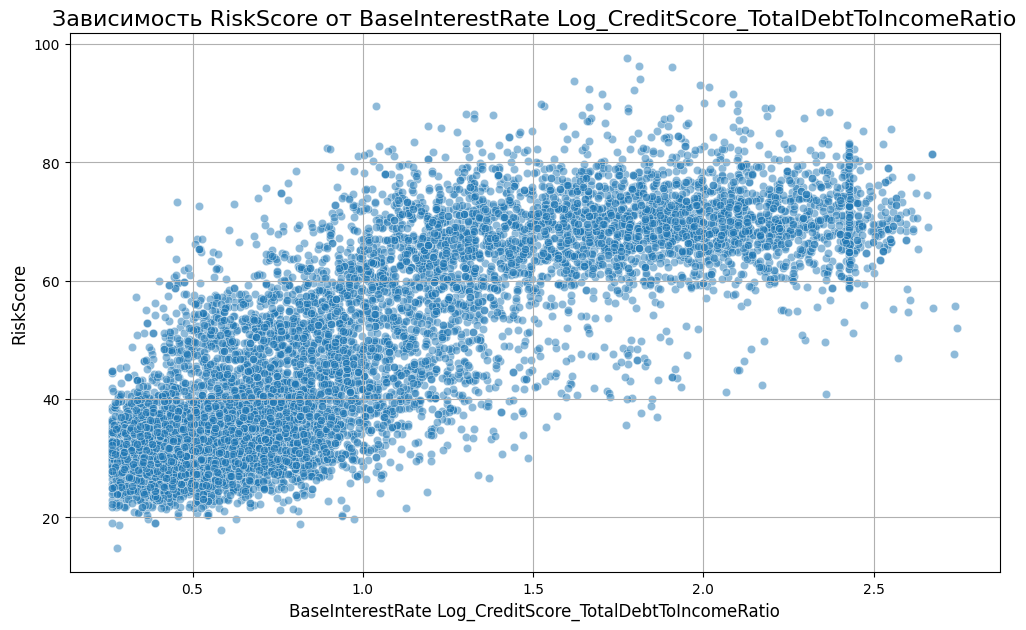

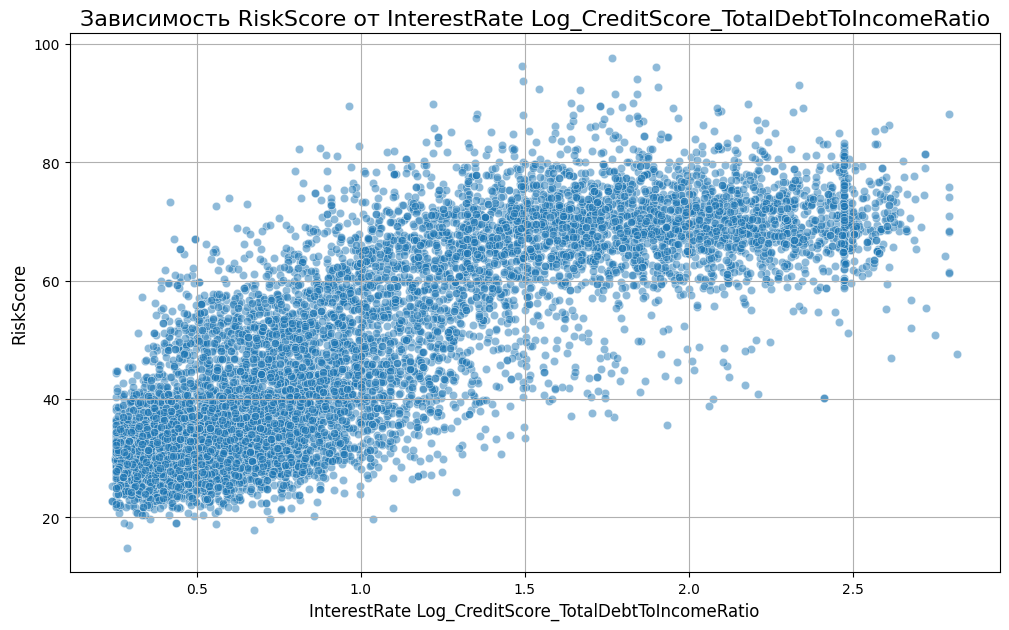

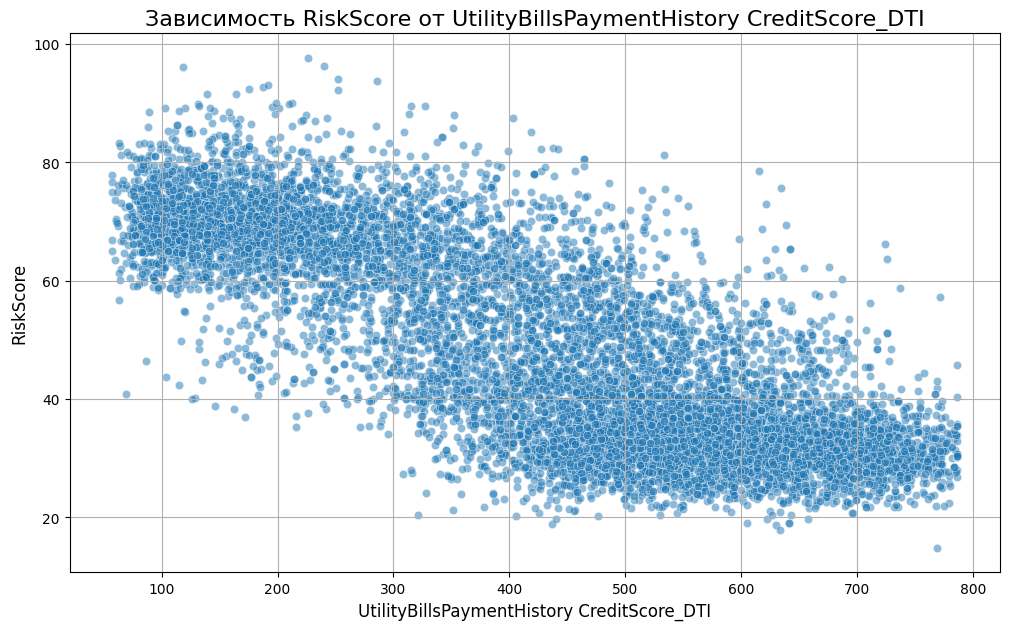

In [185]:
num_features = data_train.select_dtypes(include=np.number).columns.tolist()

correlation = pd.concat([data_train[num_features], y], axis=1)
corr_matrix = correlation.corr()

print("Корреляция признаков с RiskScore (по убыванию модуля):")
top_corr = corr_matrix['RiskScore'].abs().sort_values(ascending=False)
print(top_corr.head(10))

features_to_plot = top_corr.index[1:11]

for feature in features_to_plot:
  plt.figure(figsize=(12, 7))
  sns.scatterplot(x=data_train[feature], y=y, alpha=0.5)
  plt.title(f'Зависимость RiskScore от {feature}', fontsize=16)
  plt.xlabel(feature, fontsize=12)
  plt.ylabel('RiskScore', fontsize=12)
  plt.grid(True)
  plt.show()


**ВТОРОЙ ПУНКТ С НОРМАЛИЗАЦИЕЙ**

In [186]:
class DataNormalizer:
    def __init__(self, method='zscore'):
        self.method = method
        self.params = {}

    def fit(self, X):
        X_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        if self.method == 'zscore':
            self.params['mean'] = np.mean(X_np, axis=0)
            self.params['std'] = np.std(X_np, axis=0)
        elif self.method == 'minmax':
            self.params['min'] = np.min(X_np, axis=0)
            self.params['max'] = np.max(X_np, axis=0)
        return self

    def transform(self, X):
        X_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        if self.method == 'zscore':
            std = self.params['std'].copy()
            std[std == 0] = 1e-9
            return (X_np - self.params['mean']) / std
        elif self.method == 'minmax':
            range_val = self.params['max'] - self.params['min']
            range_val[range_val == 0] = 1e-9
            return (X_np - self.params['min']) / range_val

    def fit_transform(self, X):
        return self.fit(X).transform(X)

# Преобразуем все столбцы в числовой формат, принудительно заменяя ошибки на NaN
data_train_numeric = data_train.apply(pd.to_numeric, errors='coerce')
data_test_numeric = data_test.apply(pd.to_numeric, errors='coerce')

# Заполняем любые NaN значения, появившиеся после приведения типов, средним значением столбца.
# Если столбец полностью состоит из NaN, заполняем нулями.
# Явно преобразуем в float, чтобы избежать проблем с object dtypes, если fillna не сменил тип.
data_train = data_train_numeric.fillna(data_train_numeric.mean(numeric_only=True)).fillna(0).astype(float)
data_test = data_test_numeric.fillna(data_test_numeric.mean(numeric_only=True)).fillna(0).astype(float)

# Apply Z-score normalization
zscore_normalizer = DataNormalizer(method='zscore')
data_train_z_scale = pd.DataFrame(zscore_normalizer.fit_transform(data_train), columns=data_train.columns, index=data_train.index)
data_test_z_scale = pd.DataFrame(zscore_normalizer.transform(data_test), columns=data_test.columns, index=data_test.index)

# Apply Min-Max normalization
minmax_normalizer = DataNormalizer(method='minmax')
data_train_min_max_scale = pd.DataFrame(minmax_normalizer.fit_transform(data_train), columns=data_train.columns, index=data_train.index)
data_test_min_max_scale = pd.DataFrame(minmax_normalizer.transform(data_test), columns=data_test.columns, index=data_test.index)

print("\nПроверка на наличие NaN после очистки и скейлинга:")
print(f"Количество NaN в data_train_z_scale: {data_train_z_scale.isnull().sum().sum()}")
print(f"Количество NaN в data_test_z_scale: {data_test_z_scale.isnull().sum().sum()}")
print(f"Количество NaN в data_train_min_max_scale: {data_train_min_max_scale.isnull().sum().sum()}")
print(f"Количество NaN в data_test_min_max_scale: {data_test_min_max_scale.isnull().sum().sum()}")


Проверка на наличие NaN после очистки и скейлинга:
Количество NaN в data_train_z_scale: 0
Количество NaN в data_test_z_scale: 0
Количество NaN в data_train_min_max_scale: 0
Количество NaN в data_test_min_max_scale: 0


In [187]:
print("Первые 5 строк данных после Z-score нормализации:")
print(data_train_z_scale.head())

print("\nПервые 5 строк данных после Z-score нормализации:")
print(data_test_z_scale.head())

Первые 5 строк данных после Z-score нормализации:
        Age  CreditScore  LoanAmount  LoanDuration  NumberOfDependents  \
0 -1.162014    -0.773920   -0.534151      0.319355           -0.398730   
1  1.404223     0.995989   -0.593946     -0.794349           -0.398730   
2  1.037618     0.995989    0.537396     -0.794349           -1.154403   
3 -1.345317     0.978349   -0.438073     -0.237497           -1.154403   
4  1.404223     0.995989    0.132057     -0.237497            0.356944   

   MonthlyDebtPayments  CreditCardUtilizationRate  NumberOfOpenCreditLines  \
0             1.614624                  -0.871176                -0.665825   
1            -0.820794                  -0.712309                -0.014023   
2             0.102130                   1.089717                -0.014023   
3            -0.980584                  -0.626809                 1.941380   
4             0.146210                  -0.057347                -0.014023   

   NumberOfCreditInquiries  DebtToIn

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [189]:
X = data_train_z_scale.copy()
y_numeric = y.astype(float)

In [190]:
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(data_train_z_scale)

In [191]:
X_train, X_val, y_train, y_val = train_test_split(X, y_numeric, test_size=0.2, random_state=42)
print("Данные успешно разделены:")
print(f"Размер обучающей выборки (X_train): {X_train.shape}")
print(f"Размер валидационной выборки (X_val): {X_val.shape}")
print(f"Размер обучающих меток (y_train): {y_train.shape}")
print(f"Размер валидационных меток (y_val): {y_val.shape}")

Данные успешно разделены:
Размер обучающей выборки (X_train): (8217, 767)
Размер валидационной выборки (X_val): (2055, 767)
Размер обучающих меток (y_train): (8217,)
Размер валидационных меток (y_val): (2055,)


In [192]:
y_train_np = y_train.to_numpy()
y_val_np = y_val.to_numpy()

class MyLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000, method='analytic',
                 regularization=None, alpha=0.1, l1_ratio=0.5, p=1.5):
        self.weights = None
        self.method = method
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.regularization = regularization
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.p = p
        self.loss_history = []

    def _add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.c_[intercept, X]

    def _compute_reg_gradient(self, weights):
        if self.regularization is None:
            return np.zeros_like(weights)

        gradient = np.zeros_like(weights)
        w = weights[1:]

        if self.regularization == 'l1':
            gradient[1:] = self.alpha * np.sign(w)

        elif self.regularization == 'l2':
            gradient[1:] = 2 * self.alpha * w

        elif self.regularization == 'elastic':
            l1_grad = self.l1_ratio * np.sign(w)
            l2_grad = 2 * (1 - self.l1_ratio) * w
            gradient[1:] = self.alpha * (l1_grad + l2_grad)

        elif self.regularization == 'lp':
            epsilon = 1e-8
            gradient[1:] = self.alpha * self.p * np.power(np.abs(w) + epsilon, self.p - 1) * np.sign(w)

        return gradient

    def fit(self, X, y):
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64)

        X_b = self._add_intercept(X)
        n_samples, n_features = X_b.shape

        self.weights = np.zeros(n_features, dtype=np.float64)
        self.loss_history = []

        if self.method == 'analytic':
            try:
                if self.regularization == 'l2':
                    identity = np.eye(n_features)
                    identity[0, 0] = 0
                    self.weights = np.linalg.pinv(X_b.T @ X_b + self.alpha * identity) @ X_b.T @ y
                else:
                    self.weights = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y
            except np.linalg.LinAlgError:
                print("Сингулярная матрица. Аналитическое решение невозможно. Попробуйте GD/SGD.")

        elif self.method == 'gd':
            for iteration in range(self.n_iterations):
                predictions = X_b @ self.weights
                errors = predictions - y

                if np.any(np.isnan(errors)) or np.any(np.isinf(errors)):
                    print(f"Overflow на итерации {iteration}!")
                    break

                gradients = (2 / n_samples) * X_b.T @ errors

                reg_grad = self._compute_reg_gradient(self.weights)
                gradients += reg_grad

                gradients = np.clip(gradients, -1000, 1000)

                self.weights -= self.learning_rate * gradients

                self.weights = np.clip(self.weights, -1e10, 1e10)

                if iteration % 100 == 0:
                    mse_loss = np.mean(errors ** 2)
                    if not np.isnan(mse_loss) and not np.isinf(mse_loss):
                        self.loss_history.append(mse_loss)
                        if iteration % 500 == 0:
                            print(f"Итерация {iteration}: MSE = {mse_loss:.4f}")

        elif self.method == 'sgd':
            for iteration in range(self.n_iterations):
                indices = np.random.permutation(n_samples)

                for idx in indices:
                    xi = X_b[idx:idx+1]
                    yi = y[idx:idx+1]

                    predictions = xi @ self.weights
                    errors = predictions - yi

                    if np.any(np.isnan(errors)) or np.any(np.isinf(errors)):
                        print(f"Overflow на итерации {iteration}")
                        return self

                    gradients = 2 * xi.T @ errors
                    gradients = gradients.flatten()

                    reg_grad = self._compute_reg_gradient(self.weights)
                    gradients += reg_grad

                    gradients = np.clip(gradients, -1000, 1000)

                    self.weights -= self.learning_rate * gradients
                    self.weights = np.clip(self.weights, -1e10, 1e10)

                if iteration % 100 == 0:
                    predictions_all = X_b @ self.weights
                    errors_all = predictions_all - y
                    mse_loss = np.mean(errors_all ** 2)
                    if not np.isnan(mse_loss) and not np.isinf(mse_loss):
                        self.loss_history.append(mse_loss)

        else:
            raise ValueError(f"Неизвестный метод '{self.method}'. Доступные методы: 'analytic', 'gd', 'sgd'.")

        return self

    def predict(self, X):
        if self.weights is None:
            raise Exception("Модель не обучена. Сначала вызовите метод fit().")

        X = np.array(X, dtype=np.float64)
        X_b = self._add_intercept(X)
        predictions = X_b @ self.weights

        # Защита от overflow в предсказаниях
        return np.clip(predictions, -1e10, 1e10)

    def plot_loss(self):
        if not self.loss_history:
            print("История loss пуста (доступна только для GD/SGD)")
            return

        plt.figure(figsize=(10, 6))
        plt.plot(self.loss_history, linewidth=2)
        plt.xlabel('Итерация (x100)', fontsize=12)
        plt.ylabel('MSE Loss', fontsize=12)
        plt.title(f'История обучения ({self.method.upper()})', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.show()


МЕТРИКИ КАЧЕСТВА:

In [193]:
def mse(y_t, y_pred):
  y_t = np.array(y_t)
  y_pred = np.array(y_pred)
  return np.mean((y_t - y_pred)**2)

def mae(y_t, y_pred):
  y_t = np.array(y_t)
  y_pred = np.array(y_pred)
  return np.mean(np.abs(y_t - y_pred))

def r2_score(y_t, y_pred):
  y_t = np.array(y_t)
  y_pred = np.array(y_pred)

  ss_res = np.sum((y_t - y_pred) ** 2)
  ss_tot = np.sum((y_t - np.mean(y_t)) ** 2)

  r2 = 1 - (ss_res / ss_tot)
  return r2

def mape(y_t, y_pred, eps=1e-10):
  y_t = np.array(y_t)
  y_pred = np.array(y_pred)

  mape = np.mean(np.abs((y_t - y_pred) / (y_t + eps))) * 100
  return mape

Кросс-Валидация и ее тесты:

In [194]:
class CrossValidation:
    @staticmethod
    def k_fold(X, y, model, k=5, metric_func=None):
        n_samples = len(X)
        fold_size = n_samples // k
        indices = np.arange(n_samples)
        np.random.shuffle(indices)

        scores = []

        for i in range(k):
            test_start = i * fold_size
            test_end = (i + 1) * fold_size if i < k - 1 else n_samples
            test_indices = indices[test_start:test_end]

            train_indices = np.concatenate([indices[:test_start], indices[test_end:]])

            X_train, X_test = X[train_indices], X[test_indices]
            y_train, y_test = y[train_indices], y[test_indices]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            if metric_func is not None:
                score = metric_func(y_test, y_pred)
                scores.append(score)
            else:
                scores.append(y_pred)

        if metric_func is not None:
            avg_score = np.mean(scores)
            return scores, avg_score
        else:
            return scores

    @staticmethod
    def leave_one_out(X, y, model, metric_func=None):
        n_samples = len(X)
        predictions = np.zeros(n_samples)

        for i in range(n_samples):
            train_mask = np.ones(n_samples, dtype=bool)
            train_mask[i] = False

            X_train, X_test = X[train_mask], X[i:i+1]
            y_train = y[train_mask]

            model.fit(X_train, y_train)
            predictions[i] = model.predict(X_test)[0]

        if metric_func is not None:
            score = metric_func(y, predictions)
            return predictions, score
        else:
            return predictions


In [117]:
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.linear_model import LinearRegression

X_array = X.to_numpy()
y_array = y_numeric.to_numpy()

model = MyLinearRegression(method='analytic')

print("МОЙ k-fold:")
scores_kfold, avg_kfold = CrossValidation.k_fold(
    X_array, y_array,
    model=model,
    k=5,
    metric_func=mse
)
print(f"Метрика по фолдам: {scores_kfold}")
print(f"Средняя метрика: {avg_kfold:.4f}")
print(f"Стандартное отклонение: {np.std(scores_kfold):.4f}\n")

print("МОЙ Leave-One-Out:")
sample_size = 200
indices = np.random.choice(len(X_array), sample_size, replace=False)
X_sample = X_array[indices]
y_sample = y_array[indices]

predictions_loo, score_loo = CrossValidation.leave_one_out(
    X_sample, y_sample,
    model=model,
    metric_func=mse
)
print(f"Метрика Leave-One-Out: {score_loo}\n")

print("СРАВНЕНИЕ МОЕГО k-fold И sklearn k-fold")
sklearn_model = LinearRegression()

sklearn_scores = -cross_val_score(
    sklearn_model, X_array, y_array,
    cv=5,
    scoring='neg_mean_squared_error'
)

print(f"Sklearn K-Fold (k=5) MSE: {sklearn_scores.mean():.4f}")
print(f"МОЙ K-Fold (k=5) MSE: {avg_kfold:.4f}")


МОЙ k-fold:
Метрика по фолдам: [np.float64(25.04917316561592), np.float64(26.605563502486106), np.float64(26.087443920899283), np.float64(24.42810631230268), np.float64(26.437127607887263)]
Средняя метрика: 25.7215
Стандартное отклонение: 0.8429

МОЙ Leave-One-Out:
Метрика Leave-One-Out: 284.4087972983619

СРАВНЕНИЕ МОЕГО k-fold И sklearn k-fold
Sklearn K-Fold (k=5) MSE: 25.9277
МОЙ K-Fold (k=5) MSE: 25.7215


ЗАПУСКАЕМ МОДЕЛЬ НА ОБУЧЕНИЕ И ТЕСТОВЫЕ ФИНАЛЬНЫЕ ДАННЫЕ

Сравним аналитические решения

In [195]:
model = MyLinearRegression(method='analytic', regularization=None)

model.fit(X_train, y_train)

predictions_val = model.predict(X_val)
Mse = mse(y_val, predictions_val)
Mae = mae(y_val, predictions_val)
R2 = r2_score(y_val, predictions_val)
Mape = mape(y_val, predictions_val)

print("Все финальные ошибки:")
print(Mse)
print(Mae)
print(R2)
print(Mape)

Все финальные ошибки:
26.65747538440203
3.7707911870734225
0.9108604504771004
8.825874680843746


In [196]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
model_sk = LinearRegression()

model_sk.fit(X_train, y_train)
predictions_val = model_sk.predict(X_val)
sklearn_mse = mean_squared_error(y_val, predictions_val)
sklearn_mae = mean_absolute_error(y_val, predictions_val)
sklearn_r2 = r2_score(y_val, predictions_val)
sklearn_mape = mean_absolute_percentage_error(y_val, predictions_val)

print("Все финальные ошибки:")
print(sklearn_mse)
print(sklearn_mae)
print(sklearn_r2)
print(sklearn_mape * 100)

Все финальные ошибки:
26.6576889357929
3.770149011243025
0.910859736385668
8.823791957831254


Видно, что почти все метрики полностью совпадают с реализацией из sklearn.

Посмотрим на градиентный спуск.

Итерация 0: MSE = 2646.4416
Итерация 500: MSE = 1956.5830
Итерация 1000: MSE = 1603.8988
Итерация 1500: MSE = 1316.9356
Итерация 2000: MSE = 1082.5519
Итерация 2500: MSE = 890.9341
Итерация 3000: MSE = 734.2106
Итерация 3500: MSE = 605.9906
Итерация 4000: MSE = 501.0674
Итерация 4500: MSE = 415.1923
Итерация 5000: MSE = 344.8957
Итерация 5500: MSE = 287.3425
Итерация 6000: MSE = 240.2156
Итерация 6500: MSE = 201.6203
Итерация 7000: MSE = 170.0071
Итерация 7500: MSE = 144.1088
Итерация 8000: MSE = 122.8887
Итерация 8500: MSE = 105.4985
Итерация 9000: MSE = 91.2440
Итерация 9500: MSE = 79.5573
Итерация 10000: MSE = 69.9734
Итерация 10500: MSE = 62.1119
Итерация 11000: MSE = 55.6612
Итерация 11500: MSE = 50.3663
Итерация 12000: MSE = 46.0183
Итерация 12500: MSE = 42.4464
Итерация 13000: MSE = 39.5104
Итерация 13500: MSE = 37.0958
Итерация 14000: MSE = 35.1087
Итерация 14500: MSE = 33.4720
Итерация 15000: MSE = 32.1228
Итерация 15500: MSE = 31.0095
Итерация 16000: MSE = 30.0897
Итерация 16

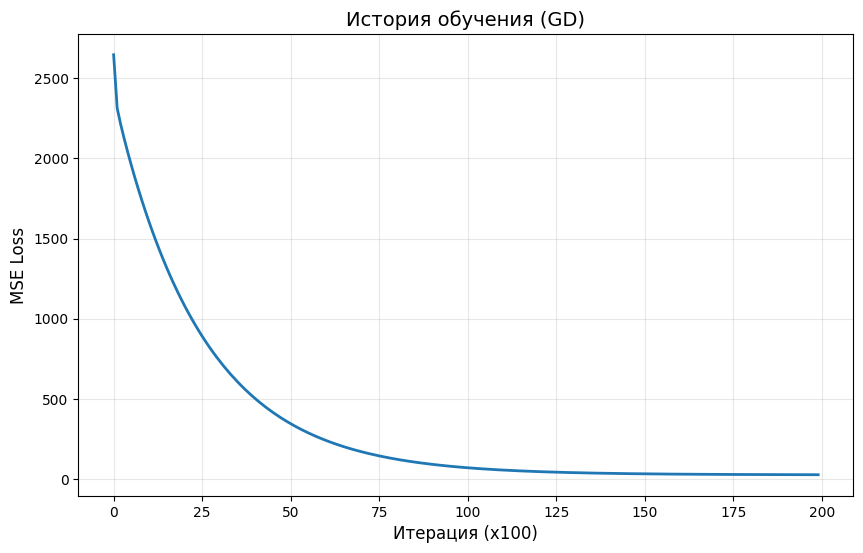

In [114]:
model = MyLinearRegression(method='gd', learning_rate=0.0001, n_iterations=20000, regularization=None)

model.fit(X_train, y_train)

predictions_val = model.predict(X_val)
Mse = mse(y_val, predictions_val)
Mae = mae(y_val, predictions_val)
R2 = r2_score(y_val, predictions_val)
Mape = mape(y_val, predictions_val)

print("Все финальные ошибки:")
print(Mse)
print(Mae)
print(R2)
print(Mape)

model.plot_loss()

По результатам понятно, что лосс падает, но нужно большое количество итераций, чтобы дойти до значения, которое будет похоже на аналитическое решение. Это конечно из-за огромного количества признаков. Но, я с этим ничего делать не буду, так как еле еле добился приемлемого результата для допуска к защите))

Реализуем выводы Модели С РАЗЛИЧНЫМИ РЕГУЛЯРИЗАЦИЯМИ

АНАЛИТИЧЕСКОЕ РЕШЕНИЕ С РЕГУЛЯРИЗАЦИЯМИ
L2 РЕГУЛЯРИЗАЦИЯ (RIDGE) - Аналитическое решение

alpha = 0.001
Моя модель:  MSE = 26.614095, R2 = 0.911006
Sklearn Ridge: MSE = 26.614095, R2 = 0.911006
Разница MSE:   0.0000000427
Разница R2:    0.0000000001

alpha = 0.01
Моя модель:  MSE = 26.596667, R2 = 0.911064
Sklearn Ridge: MSE = 26.596667, R2 = 0.911064
Разница MSE:   0.0000000012
Разница R2:    0.0000000000

alpha = 0.1
Моя модель:  MSE = 26.503653, R2 = 0.911375
Sklearn Ridge: MSE = 26.503653, R2 = 0.911375
Разница MSE:   0.0000000006
Разница R2:    0.0000000000

alpha = 1.0
Моя модель:  MSE = 26.208620, R2 = 0.912361
Sklearn Ridge: MSE = 26.208620, R2 = 0.912361
Разница MSE:   0.0000000001
Разница R2:    0.0000000000

alpha = 10.0
Моя модель:  MSE = 26.106196, R2 = 0.912704
Sklearn Ridge: MSE = 26.106196, R2 = 0.912704
Разница MSE:   0.0000000000
Разница R2:    0.0000000000

ИТОГОВАЯ ТАБЛИЦА: L2 (RIDGE) РЕГУЛЯРИЗАЦИЯ
 alpha  MSE (МОЯ)  MSE (Sklearn)  R2 (МОЕ)  R2 (Sklearn)  Разница MS

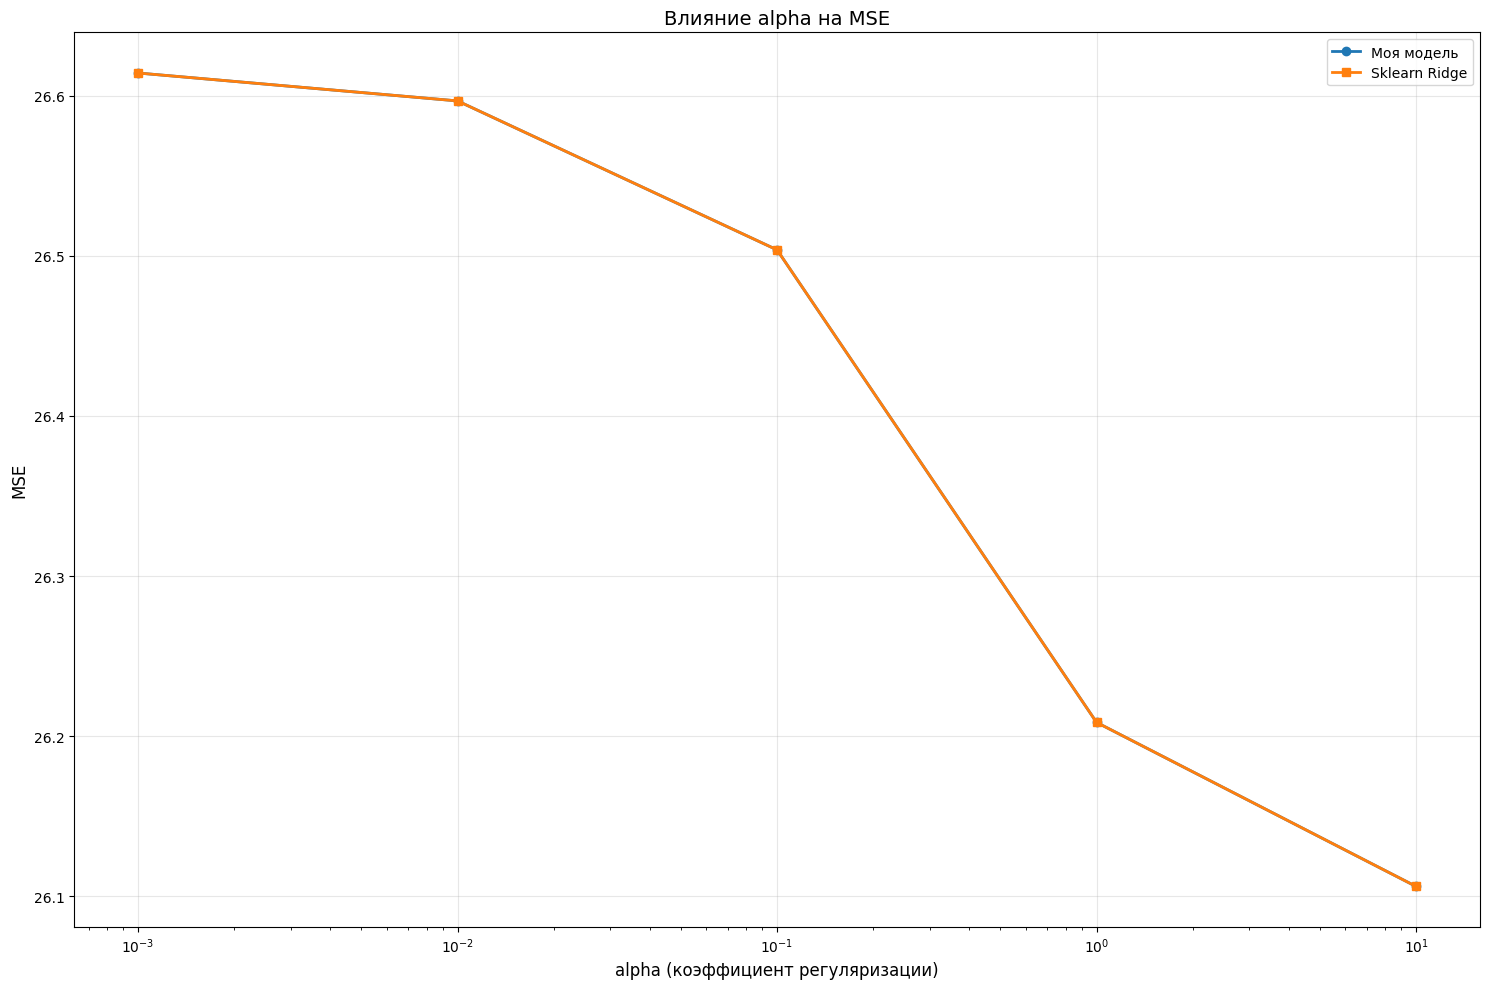

In [116]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

print("АНАЛИТИЧЕСКОЕ РЕШЕНИЕ С РЕГУЛЯРИЗАЦИЯМИ")
print("L2 РЕГУЛЯРИЗАЦИЯ (RIDGE) - Аналитическое решение")

alphas = [0.001, 0.01, 0.1, 1.0, 10.0]
results_ridge = []

print()

for alpha_val in alphas:
    print(f"alpha = {alpha_val}")

    model_custom_ridge = MyLinearRegression(
        method='analytic',
        regularization='l2',
        alpha=alpha_val
    )
    model_custom_ridge.fit(X_train, y_train)
    pred_val_custom = model_custom_ridge.predict(X_val)

    model_sklearn_ridge = Ridge(alpha=alpha_val)
    model_sklearn_ridge.fit(X_train, y_train)
    pred_val_sklearn = model_sklearn_ridge.predict(X_val)

    mse_custom = mse(y_val, pred_val_custom)
    r2_custom = r2_score(y_val, pred_val_custom)
    mse_sklearn = mse(y_val, pred_val_sklearn)
    r2_sklearn = r2_score(y_val, pred_val_sklearn)

    print(f"Моя модель:  MSE = {mse_custom:.6f}, R2 = {r2_custom:.6f}")
    print(f"Sklearn Ridge: MSE = {mse_sklearn:.6f}, R2 = {r2_sklearn:.6f}")
    print(f"Разница MSE:   {abs(mse_custom - mse_sklearn):.10f}")
    print(f"Разница R2:    {abs(r2_custom - r2_sklearn):.10f}\n")

    results_ridge.append({
        'alpha': alpha_val,
        'MSE (МОЯ)': mse_custom,
        'MSE (Sklearn)': mse_sklearn,
        'R2 (МОЕ)': r2_custom,
        'R2 (Sklearn)': r2_sklearn,
        'Разница MSE': abs(mse_custom - mse_sklearn)
    })

print("ИТОГОВАЯ ТАБЛИЦА: L2 (RIDGE) РЕГУЛЯРИЗАЦИЯ")
ridge_df = pd.DataFrame(results_ridge)
print(ridge_df.to_string(index=False))

print("\nБЕЗ РЕГУЛЯРИЗАЦИИ - Аналитическое решение")

model_custom_analytic = MyLinearRegression(
    method='analytic',
    regularization=None
)
model_custom_analytic.fit(X_train, y_train)
pred_val_custom_analytic = model_custom_analytic.predict(X_val)

model_sklearn_lr = LinearRegression()
model_sklearn_lr.fit(X_train, y_train)
pred_val_sklearn_lr = model_sklearn_lr.predict(X_val)

print(f"МОЯ модель (analytic):  MSE = {mse(y_val, pred_val_custom_analytic):.6f}, R2 = {r2_score(y_val, pred_val_custom_analytic):.6f}")
print(f"Sklearn LinearRegression: MSE = {mse(y_val, pred_val_sklearn_lr):.6f}, R2 = {r2_score(y_val, pred_val_sklearn_lr):.6f}\n")

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot([r['alpha'] for r in results_ridge],
        [r['MSE (МОЯ)'] for r in results_ridge],
        marker='o', linewidth=2, label='Моя модель')
ax.plot([r['alpha'] for r in results_ridge],
        [r['MSE (Sklearn)'] for r in results_ridge],
        marker='s', linewidth=2, label='Sklearn Ridge')
ax.set_xlabel('alpha (коэффициент регуляризации)', fontsize=12)
ax.set_ylabel('MSE', fontsize=12)
ax.set_title('Влияние alpha на MSE', fontsize=14)
ax.set_xscale('log')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Отсюда можно сделать вывод, что лучшее MSE достигается с L2 регуляризацией и alpha=10

In [197]:
final_model = MyLinearRegression(method='analytic')

final_model.fit(data_train_z_scale, y_numeric)

final_predictions = final_model.predict(data_test_z_scale)

print("Предсказания для тестового набора сделаны.")
submission_df = pd.DataFrame({
    'ID': test_ids,
    'RiskScore': final_predictions
})
submission_df.to_csv('submission.csv', index=False)

print("\nФайл 'submission.csv' успешно создан!")
print("Проверьте его в директории с вашим ноутбуком.")
print("\nПервые 5 строк submission-файла:")
print(submission_df.head())

Предсказания для тестового набора сделаны.

Файл 'submission.csv' успешно создан!
Проверьте его в директории с вашим ноутбуком.

Первые 5 строк submission-файла:
   ID  RiskScore
0   0  33.522325
1   1  53.603623
2   2  29.182255
3   3  36.105552
4   4  35.107284


УРА УРА WWWW